In [2]:
# -*- coding: utf-8 -*-
"""
Módulo inicial — carregamento completo da base GNSS (~500 mil registros)
Não faz nenhum processamento, filtragem ou renomeação.
Apenas lê o JSON e retorna o DataFrame completo.
"""

import json
import pandas as pd
from pathlib import Path

def carregar_base(json_path: str = "Dataset_Vetor.json") -> pd.DataFrame:
    """
    Carrega o arquivo Dataset_Vetor.json e retorna um DataFrame completo.

    Parâmetros
    ----------
    json_path : str
        Caminho para o arquivo JSON contendo os dados GNSS.

    Retorna
    -------
    pd.DataFrame
        DataFrame com todos os registros e colunas originais.
    """
    caminho = Path(json_path)
    if not caminho.exists():
        raise FileNotFoundError(f"❌ Arquivo não encontrado: {caminho.resolve()}")

    print(f"📥 Lendo arquivo JSON: {caminho.name} ...")
    with caminho.open("r", encoding="utf-8") as f:
        data = json.load(f)

    df = pd.DataFrame(data)
    print(f"✅ Base carregada com sucesso: {len(df):,} registros | {len(df.columns)} colunas")

    return df

# Teste rápido (opcional)
if __name__ == "__main__":
    df = carregar_base("Dataset_Vetor.json")
    print(df.info())
    print(df.head(3))


📥 Lendo arquivo JSON: Dataset_Vetor.json ...
✅ Base carregada com sucesso: 419,878 registros | 647 colunas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419878 entries, 0 to 419877
Columns: 647 entries, altitude to constellationType6-svid29-carrierFrequencyHz
dtypes: float64(645), int64(2)
memory usage: 2.0 GB
None
   altitude  accuracy  speed  bearing  timestamp  diferencalatitudeMetros  \
0  432.5000    3.8000 0.1364 353.6200     0.3355                  -4.6700   
1  428.6000    2.0000 0.1117 294.9400     0.3355                  -3.5600   
2  427.5000    1.7000 0.1122 293.6400     0.3355                  -2.8200   

   diferencalongitudeMetros  constellationType1-svid  \
0                   -1.8400                       10   
1                   -1.8400                       10   
2                    0.5700                       10   

   constellationType1-svid21-azimuthDegrees  \
0                                  205.0000   
1                                  205.0000   
2   

🎯 1. Exploração Geral dos Dados GNSS

| Tipo | Nome do gráfico                                      | O que mostra                                                                | Quando usar                                              |
| ---- | ---------------------------------------------------- | --------------------------------------------------------------------------- | -------------------------------------------------------- |
| 📊   | **Histograma** (`sns.histplot`)                      | Distribuição geral de uma variável numérica (ex: altitude, accuracy, speed) | Primeira visão da densidade e dispersão                  |
| 📈   | **Gráfico de densidade (KDE)** (`sns.kdeplot`)       | Suaviza o histograma, útil para comparar formas de distribuição             | Ideal para comparar variáveis como `accuracy` ou `speed` |
| 📦   | **Boxplot** (`sns.boxplot`)                          | Quartis e outliers de cada variável                                         | Mostra dispersão e valores extremos                      |
| 🧁   | **Violin plot** (`sns.violinplot`)                   | Distribuição + quartis na mesma figura                                      | Mostra assimetria e caudas longas                        |
| 🧩   | **Heatmap de correlação** (`sns.heatmap(df.corr())`) | Correlação entre todas as variáveis numéricas                               | Identifica relações entre altitude, accuracy, etc.       |
| 🧮   | **Pairplot (scatter matrix)** (`sns.pairplot`)       | Gráficos de dispersão cruzada entre pares de variáveis                      | Detecta dependências e padrões entre colunas principais  |


✅ Base com 419,878 registros e 647 colunas numéricas


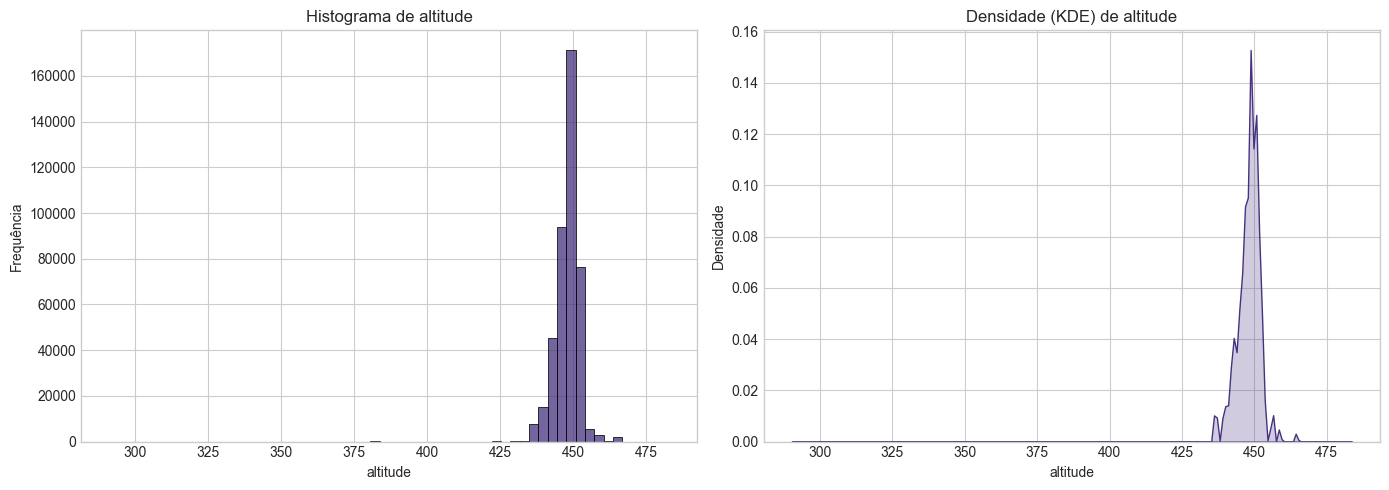

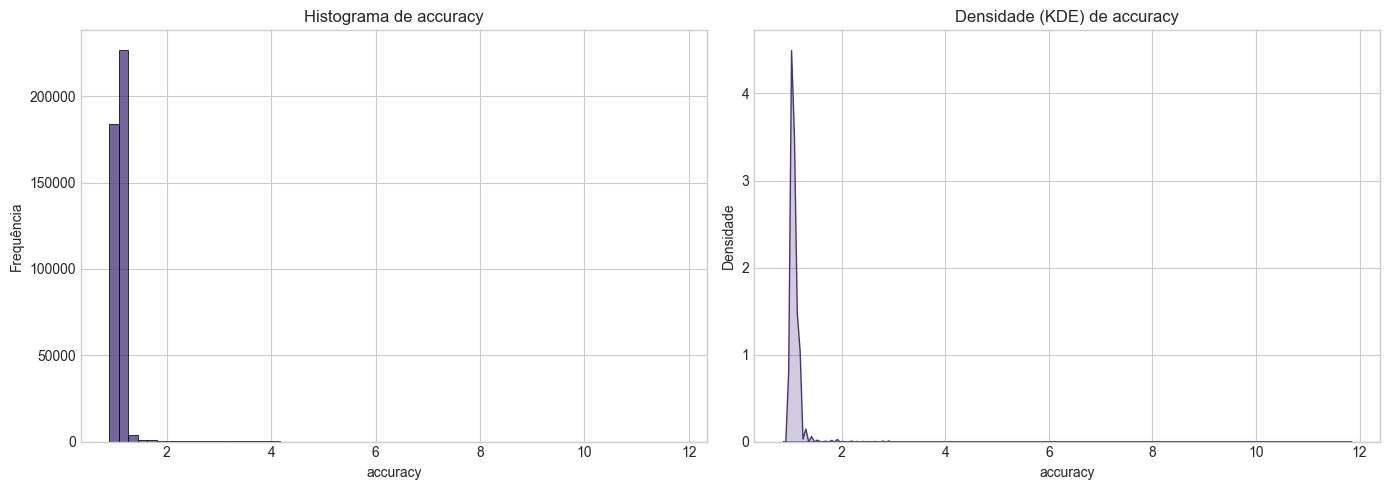

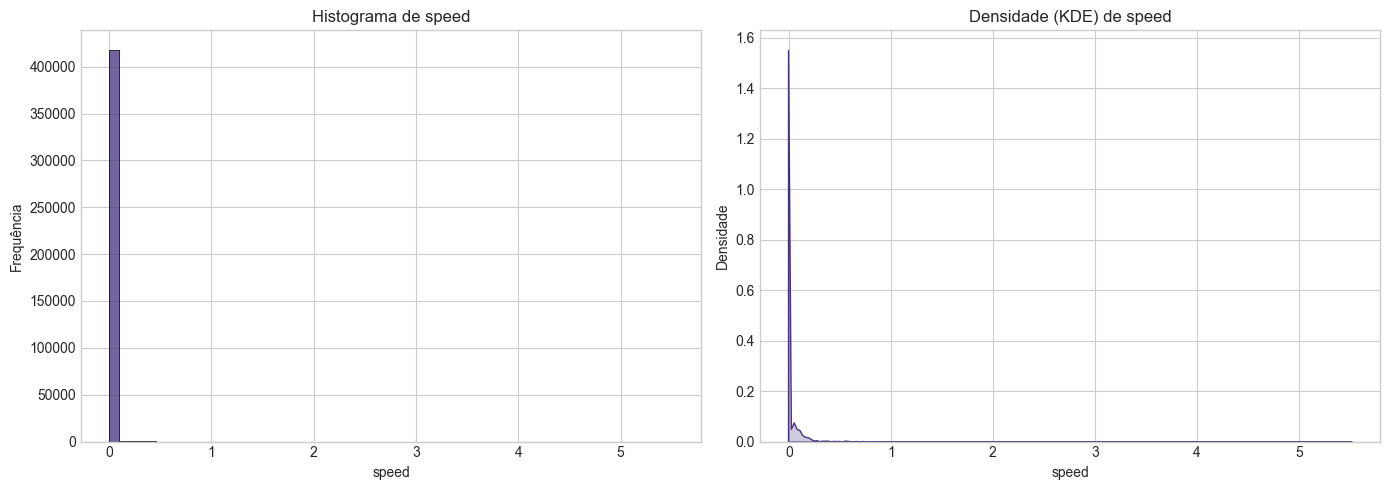

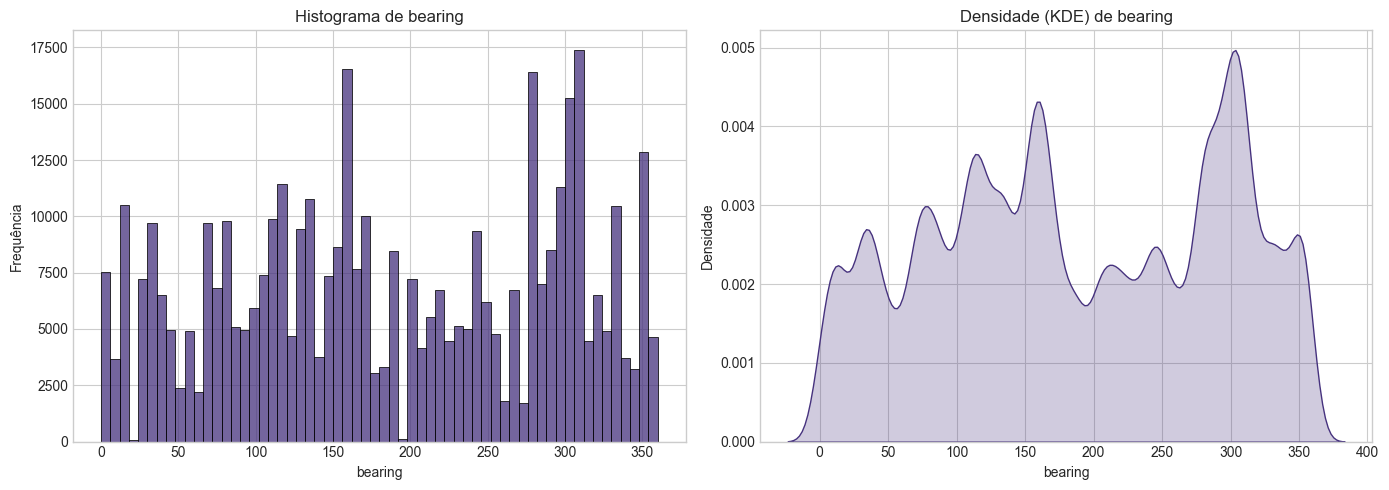

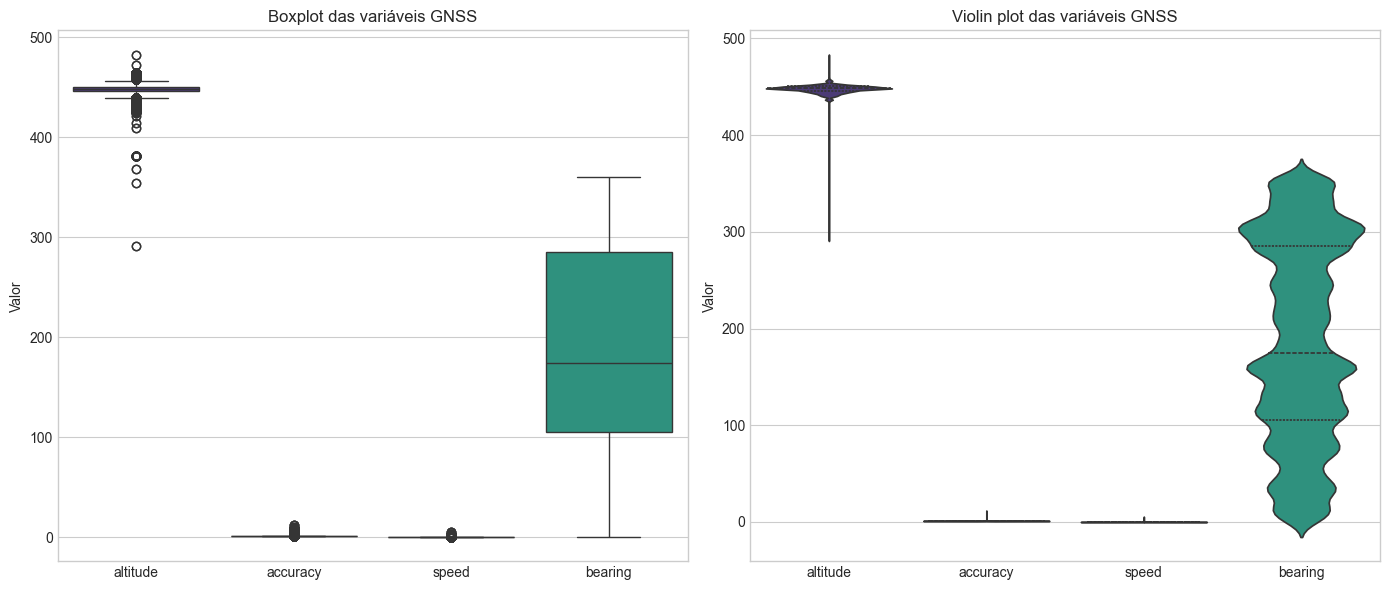

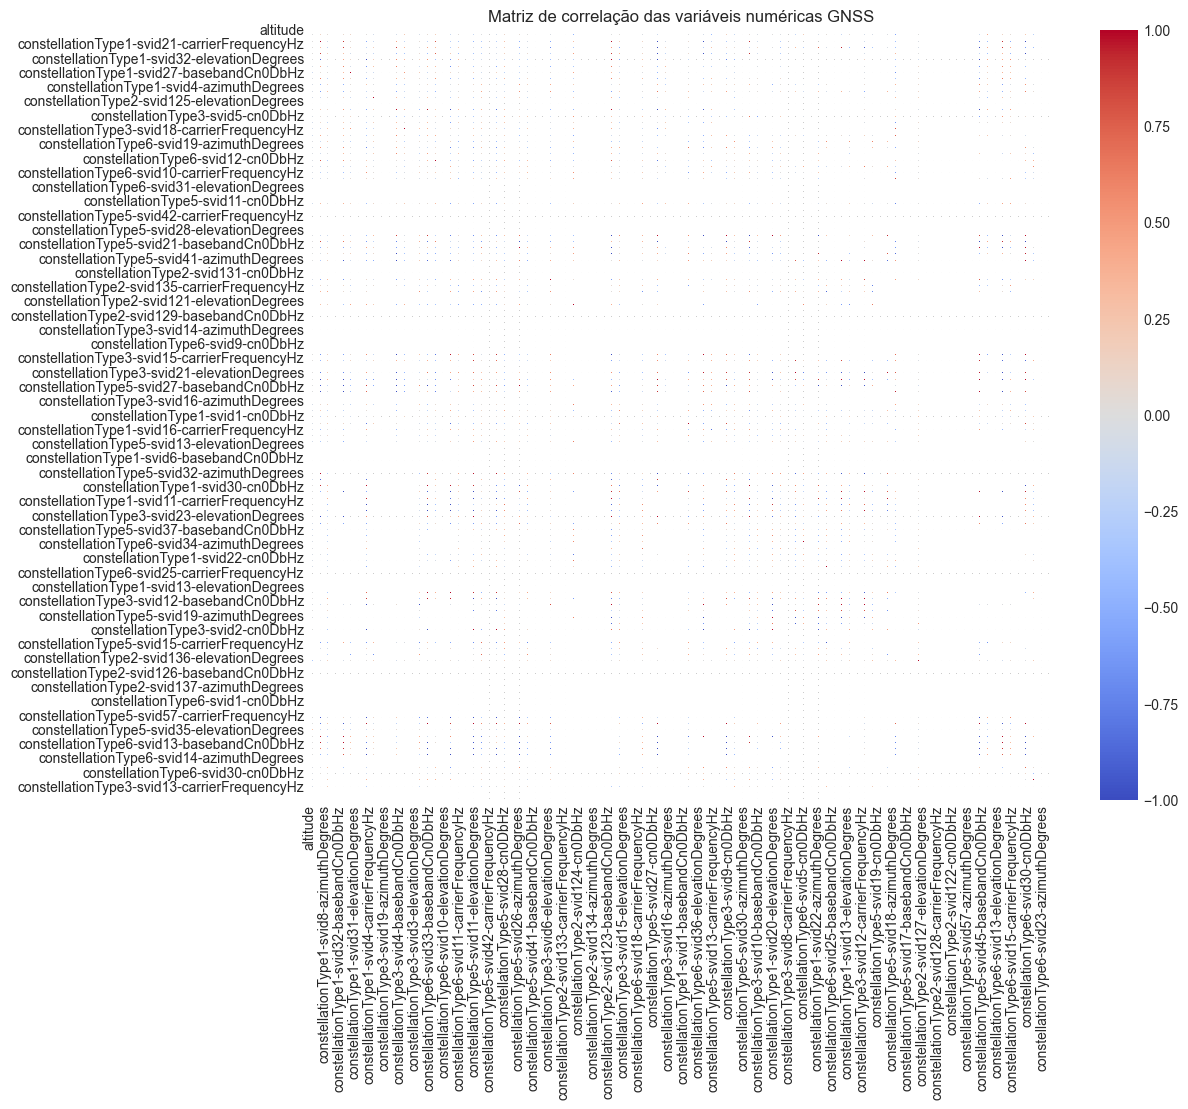

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


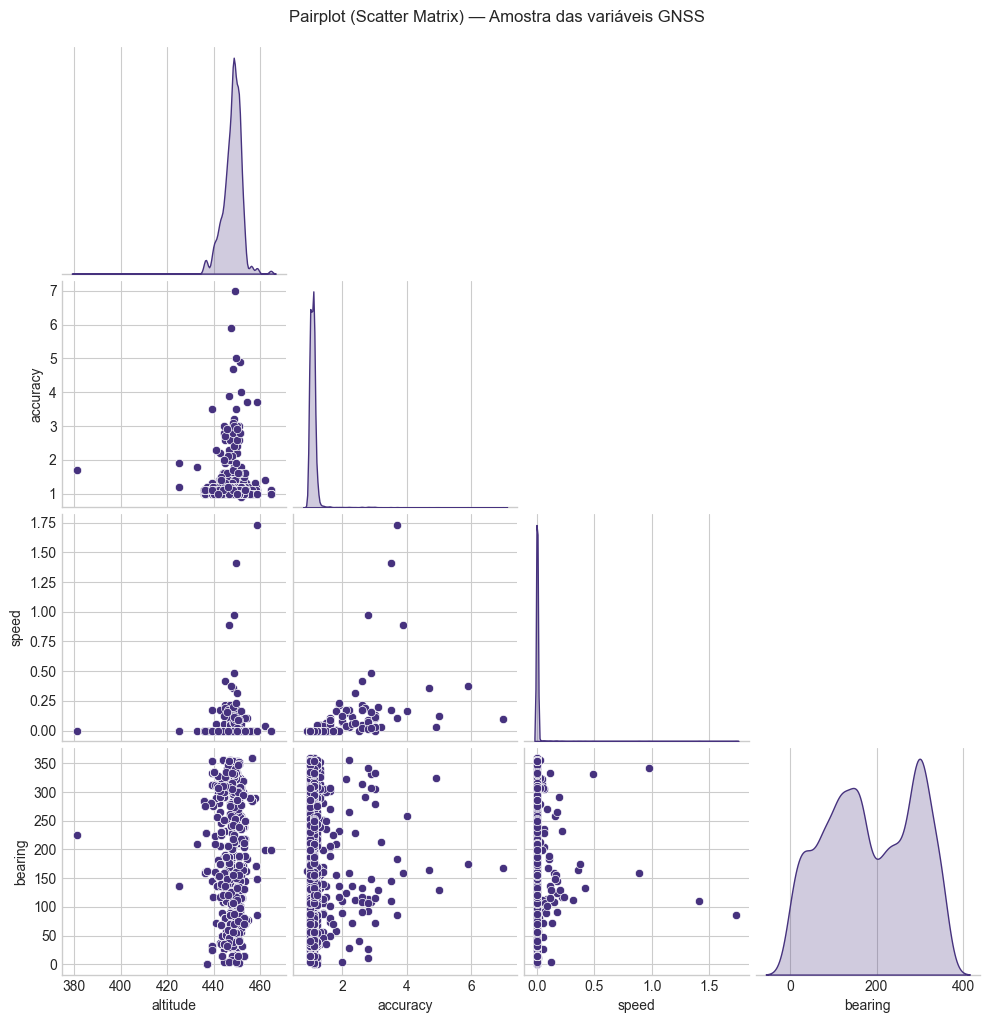

In [3]:
# ============================================
# PARTE 1 — EXPLORAÇÃO INICIAL DA BASE GNSS
# Histograma | KDE | Boxplot | Violin | Heatmap | Pairplot
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurações visuais
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_palette("viridis")

# Base já carregada com o módulo anterior
# df = carregar_base("Dataset_Vetor.json")

# Seleciona apenas colunas numéricas relevantes (para não plotar colunas de satélites)
df_num = df.select_dtypes(include=np.number).copy()

print(f"✅ Base com {len(df_num):,} registros e {len(df_num.columns)} colunas numéricas")

# ==============
# HISTOGRAMAS + KDE
# ==============
cols_principais = ["altitude", "accuracy", "speed", "bearing"]
for col in cols_principais:
    if col in df_num.columns:
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        sns.histplot(df_num[col], bins=60, kde=False, ax=ax[0])
        ax[0].set_title(f"Histograma de {col}")
        ax[0].set_xlabel(col)
        ax[0].set_ylabel("Frequência")

        sns.kdeplot(df_num[col], fill=True, ax=ax[1])
        ax[1].set_title(f"Densidade (KDE) de {col}")
        ax[1].set_xlabel(col)
        ax[1].set_ylabel("Densidade")
        plt.tight_layout()
        plt.show()

# ==============
# BOXPLOTS E VIOLIN PLOTS
# ==============
cols_box = [c for c in ["altitude", "accuracy", "speed", "bearing"] if c in df_num.columns]

if cols_box:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(data=df_num[cols_box], ax=ax[0])
    ax[0].set_title("Boxplot das variáveis GNSS")
    ax[0].set_ylabel("Valor")

    sns.violinplot(data=df_num[cols_box], inner="quartile", ax=ax[1])
    ax[1].set_title("Violin plot das variáveis GNSS")
    ax[1].set_ylabel("Valor")

    plt.tight_layout()
    plt.show()

# ==============
# HEATMAP DE CORRELAÇÃO
# ==============
corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matriz de correlação das variáveis numéricas GNSS")
plt.show()

# ==============
# PAIRPLOT (SCATTER MATRIX)
# ==============
# Seleciona subconjunto pequeno (evita travar com 500k registros)
subset_cols = [c for c in ["altitude", "accuracy", "speed", "bearing"] if c in df_num.columns]
amostra = df_num[subset_cols].sample(min(5000, len(df_num)), random_state=42)

sns.pairplot(amostra, corner=True, diag_kind="kde")
plt.suptitle("Pairplot (Scatter Matrix) — Amostra das variáveis GNSS", y=1.02)
plt.show()


📍 2. Análise dos Erros (Latitude / Longitude / Radial)

| Tipo | Nome                                            | O que evidencia                                | Relevância                                                  |
| ---- | ----------------------------------------------- | ---------------------------------------------- | ----------------------------------------------------------- |
| 🔹   | **Histograma de erro** (`lat`, `lon`, `radial`) | Distribuição dos erros em metros               | Mostra que há dispersão significativa                       |
| 📈   | **ECDF (Cumulative Distribution)**              | Percentual acumulado de amostras por erro      | Prova que, por exemplo, “90% das amostras têm erro ≤ X m”   |
| 📦   | **Boxplot de erros**                            | Quartis e amplitude dos erros                  | Mostra assimetria e outliers dos erros GNSS                 |
| 🧁   | **Violin de erros**                             | Densidade + quartis                            | Mostra que o erro tem caudas longas e dispersão assimétrica |
| 📊   | **Barras de MAE / RMSE / MSE**                  | Compara magnitude dos erros das três dimensões | Quantifica qual componente é mais instável                  |
| 🧭   | **Scatter LAT × LON**                           | Relação entre erros em latitude e longitude    | Mostra se há padrão direcional no erro                      |
| 🧱   | **Hexbin (2D density)** (`plt.hexbin`)          | Densidade 2D de erros                          | Melhor para 500 k amostras; visual robusto e limpo          |
| 🔥   | **Heatmap radial**                              | Densidade radial de erro                       | Demonstra dispersão espacial simétrica ou enviesada         |


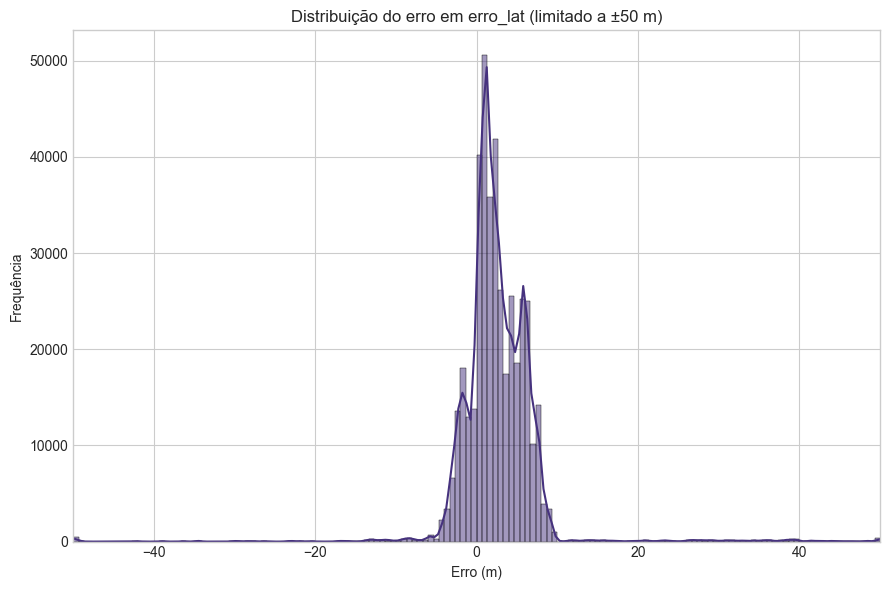

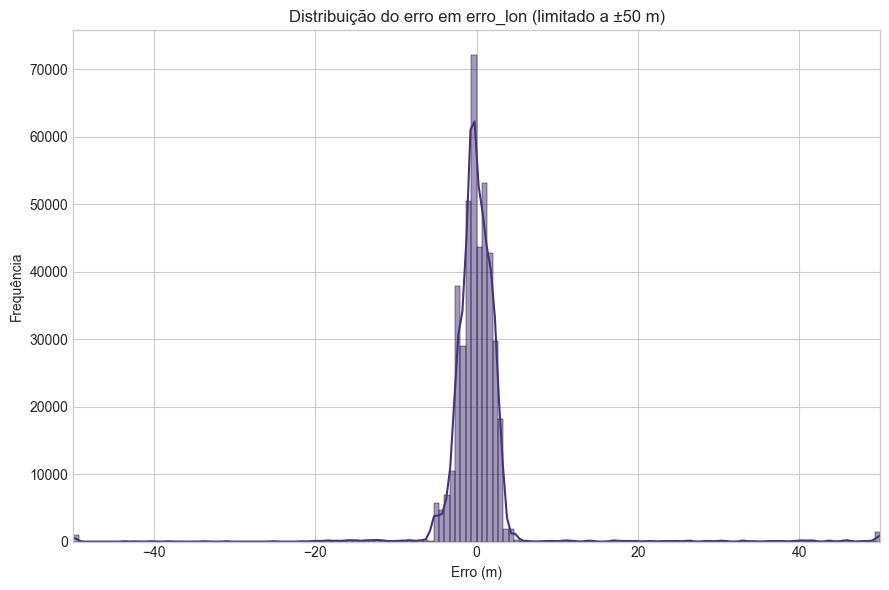

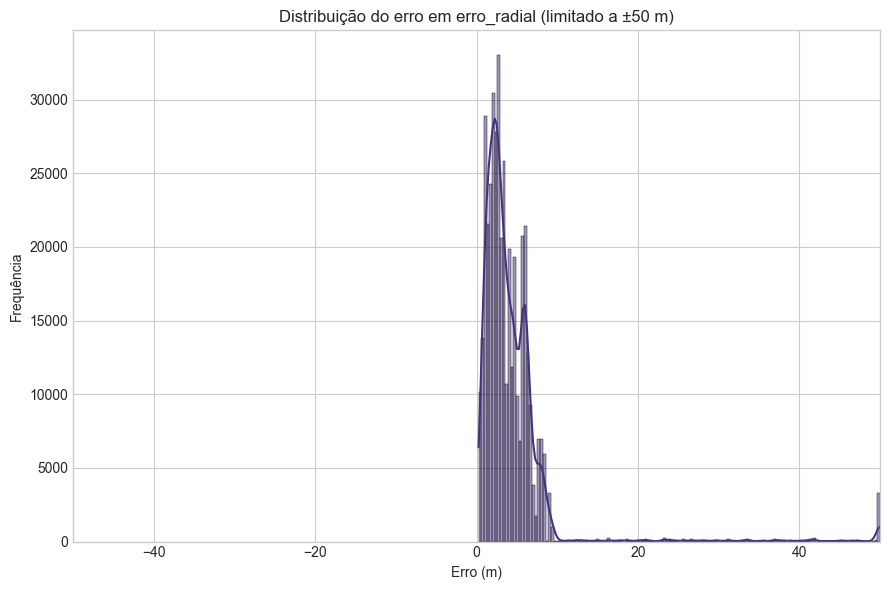

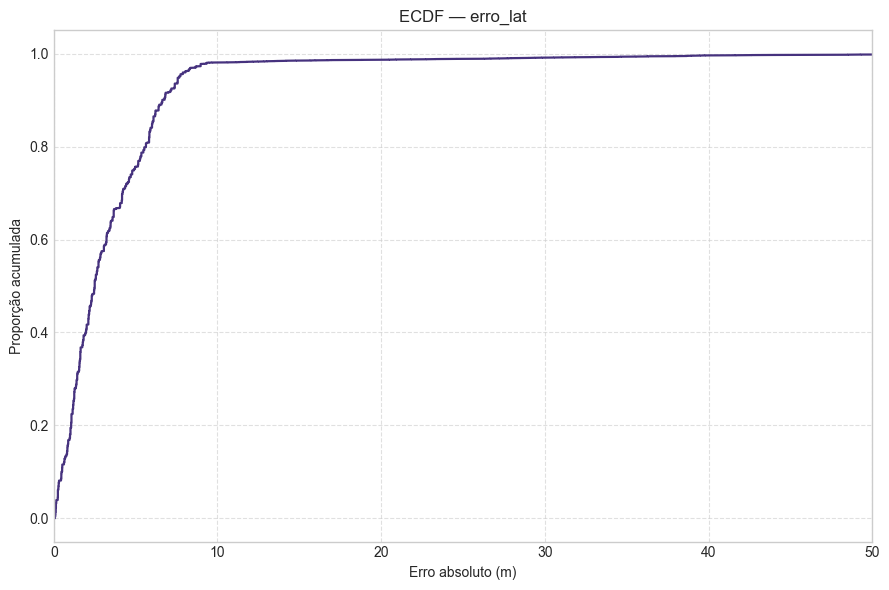

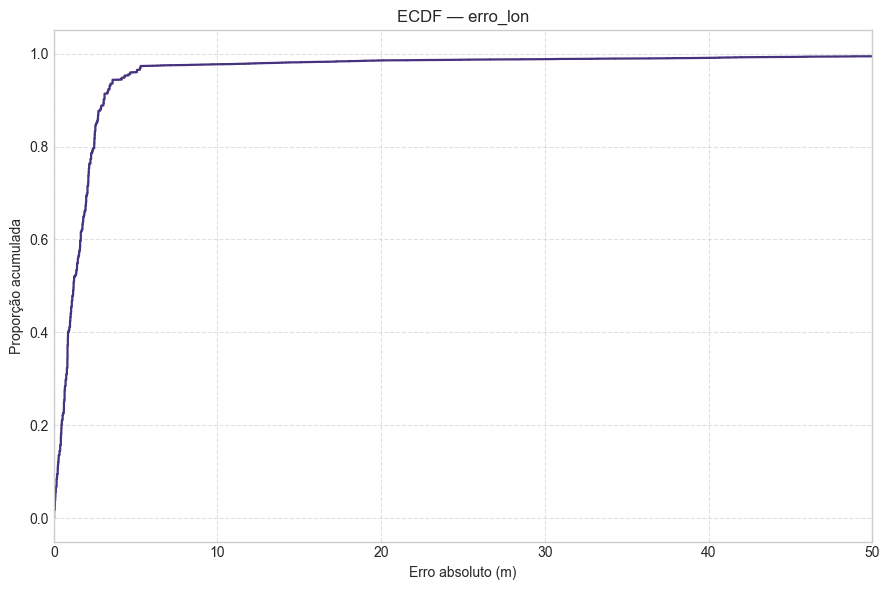

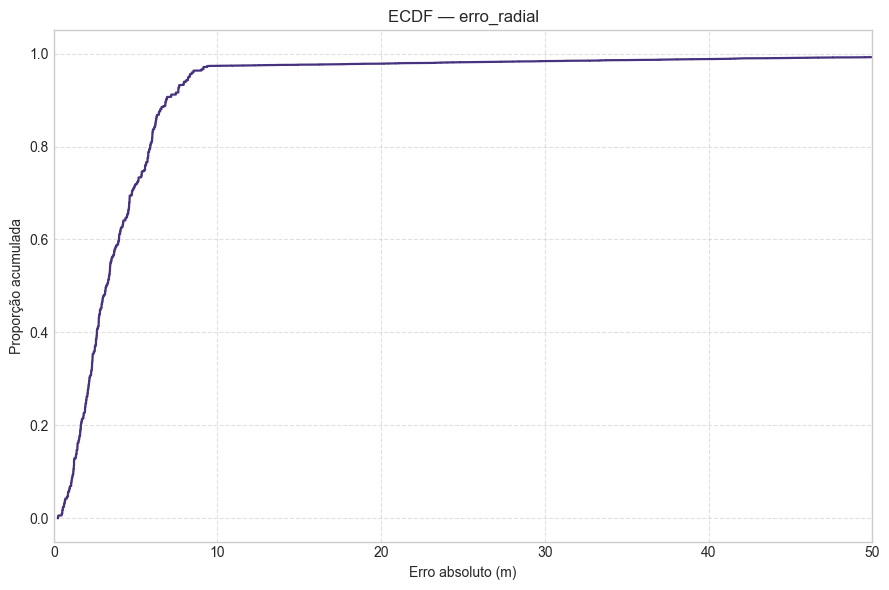

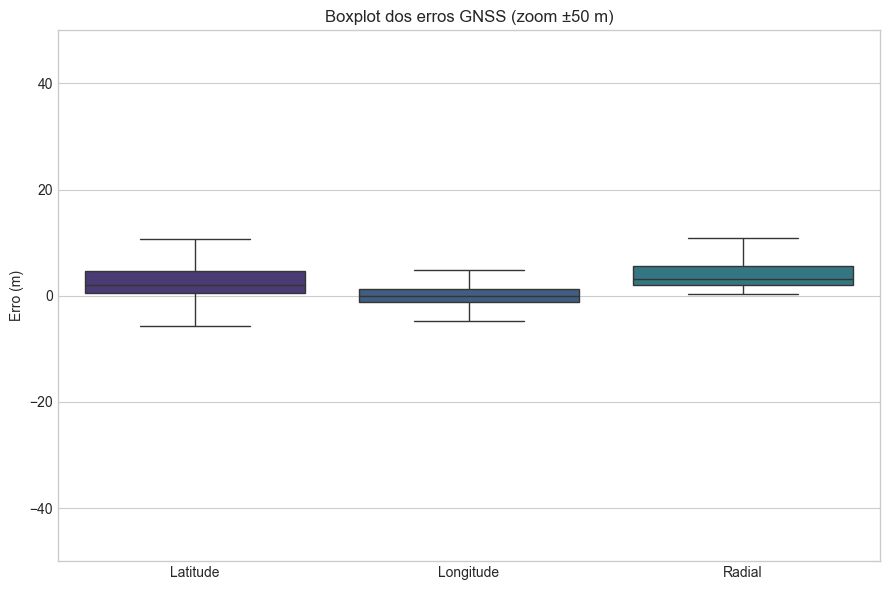

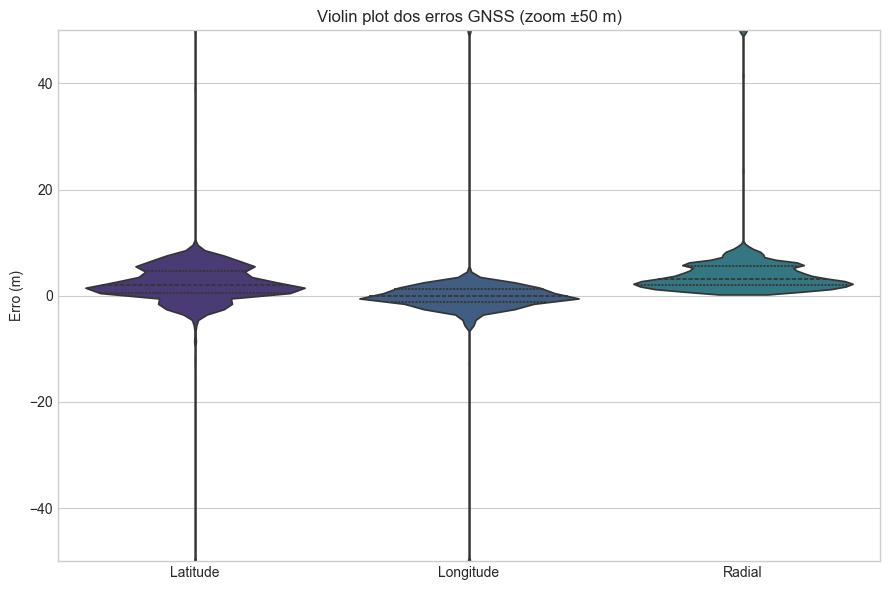

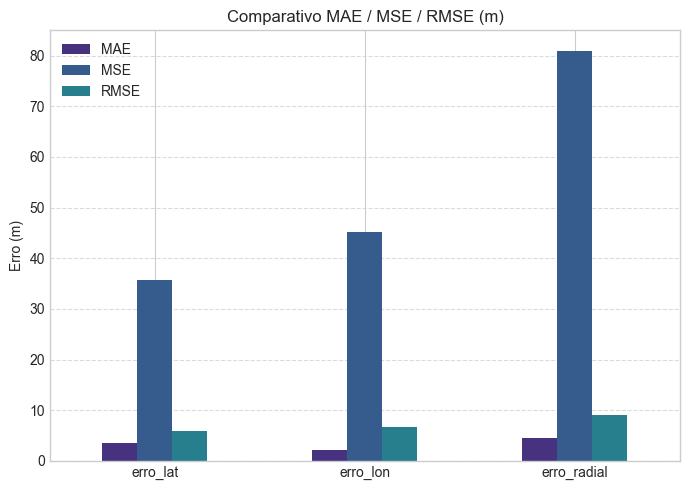

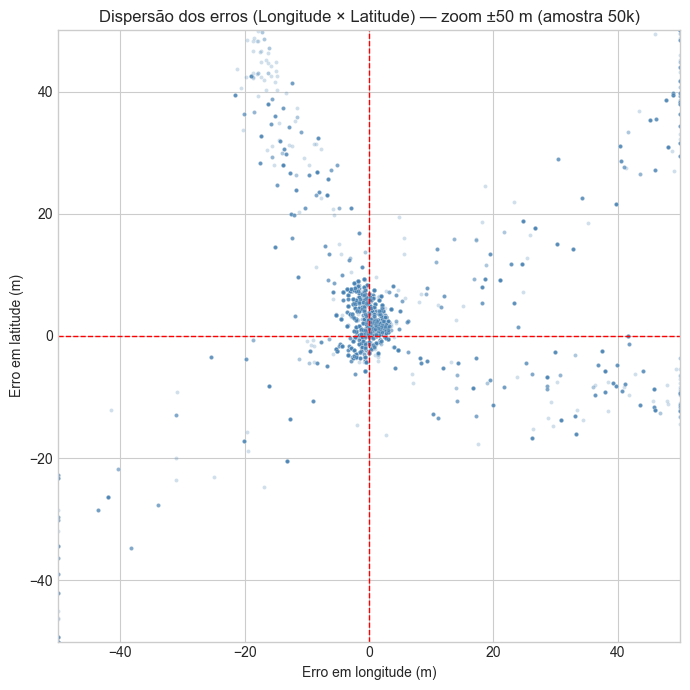

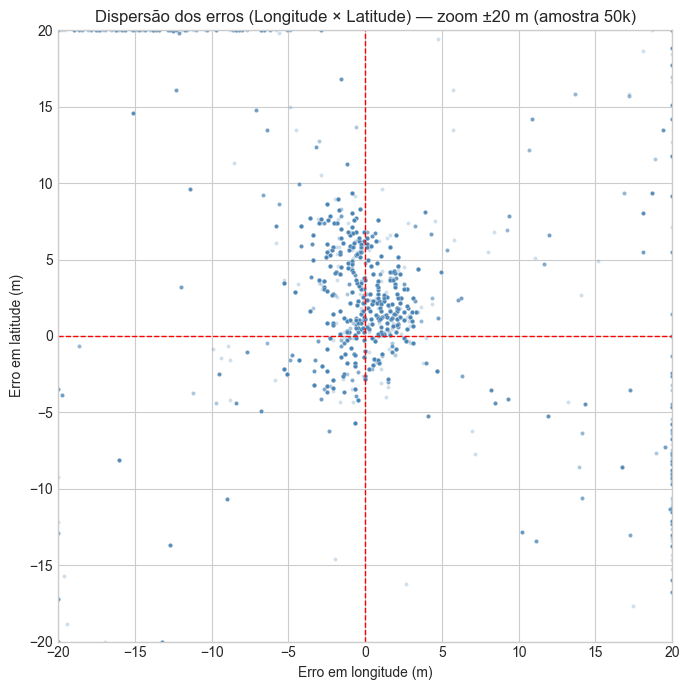

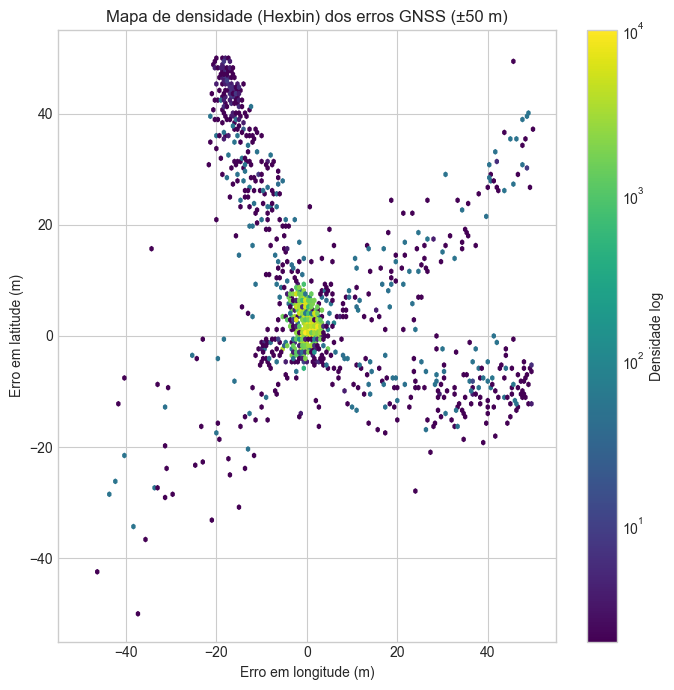

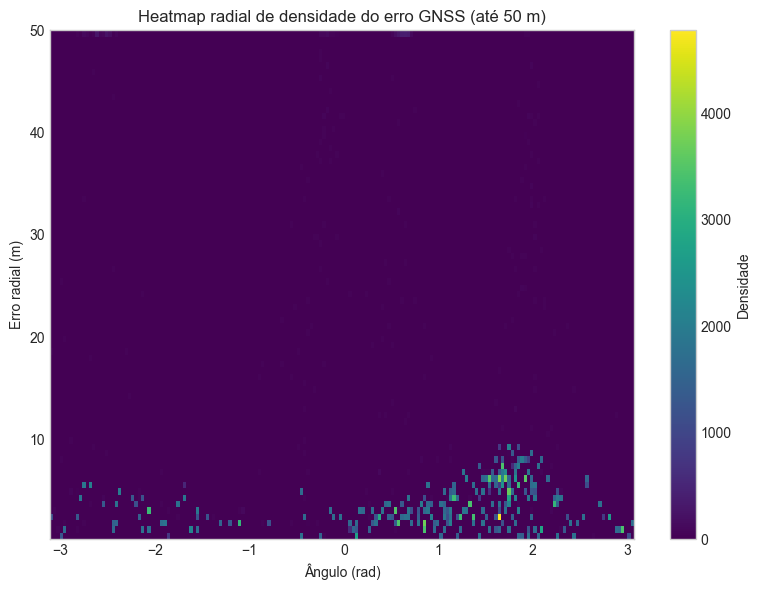

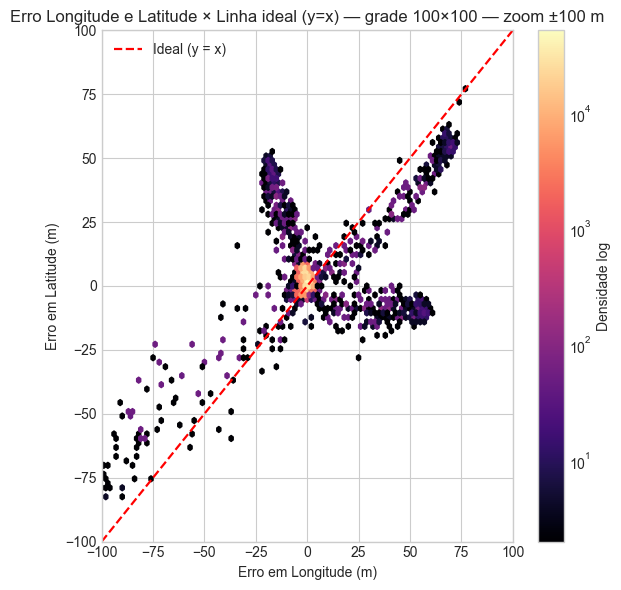

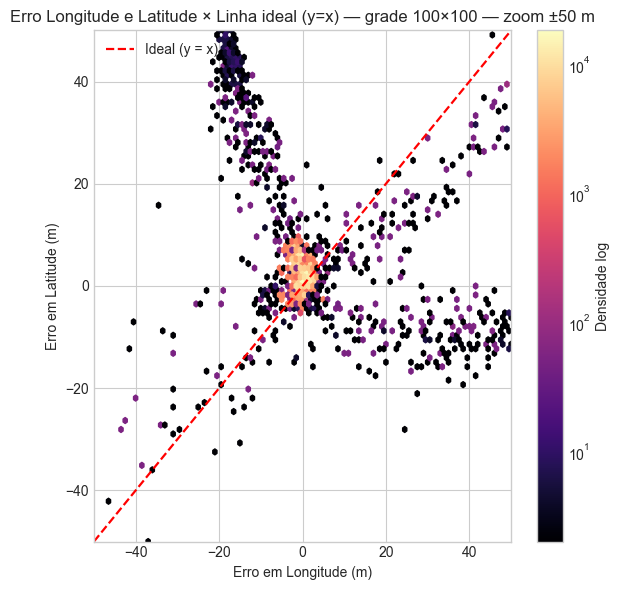

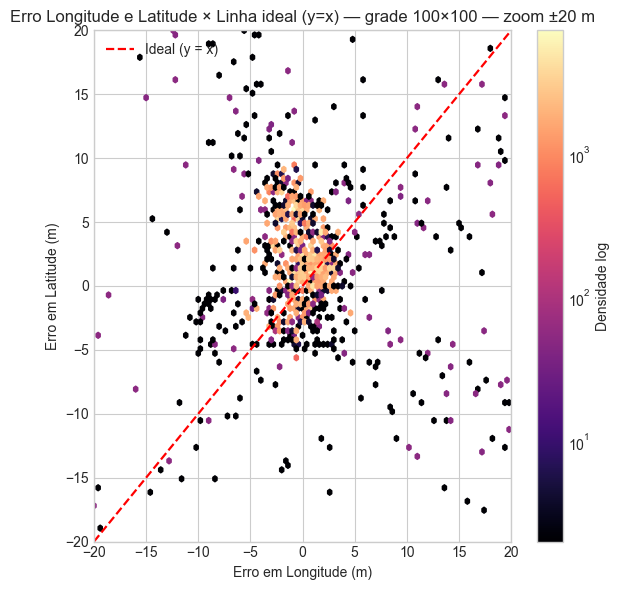

In [9]:
# ============================================
# PARTE 2 — ANÁLISE DOS ERROS GNSS (REFEITA)
# Histogramas | ECDF | Box/Violin (zoom) | MAE/MSE/RMSE | Scatter | Hexbin | Heatmap radial
# + Zero Absoluto isolado (Latitude e Longitude) com grade 100x100 e zooms
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (9, 6)
sns.set_palette("viridis")

# =========================================================
# Variáveis de erro
# =========================================================
if "erro_lat" not in df.columns: 
    df["erro_lat"] = df["diferencalatitudeMetros"]
if "erro_lon" not in df.columns: 
    df["erro_lon"] = df["diferencalongitudeMetros"]
if "erro_radial" not in df.columns:
    df["erro_radial"] = np.sqrt(df["erro_lat"]**2 + df["erro_lon"]**2)

# =========================================================
# 1) Histograma (com limites de visualização)
# =========================================================
for col, xlim in [("erro_lat", 50), ("erro_lon", 50), ("erro_radial", 50)]:
    plt.figure()
    sns.histplot(df[col].clip(-xlim, xlim), bins=150, kde=True)
    plt.title(f"Distribuição do erro em {col} (limitado a ±{xlim} m)")
    plt.xlabel("Erro (m)")
    plt.ylabel("Frequência")
    plt.xlim(-xlim, xlim)
    plt.tight_layout()
    plt.show()

# =========================================================
# 2) ECDF (Cumulative Distribution) dos erros absolutos (até 50 m)
# =========================================================
for col in ["erro_lat", "erro_lon", "erro_radial"]:
    vals = np.sort(np.abs(df[col].values))
    y = np.arange(1, len(vals) + 1) / len(vals)
    plt.figure()
    plt.plot(vals, y, lw=1.6)
    plt.xlim(0, 50)
    plt.xlabel("Erro absoluto (m)")
    plt.ylabel("Proporção acumulada")
    plt.title(f"ECDF — {col}")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# =========================================================
# 3) Boxplot e Violin (zoom ±50 m, sem outliers)
# =========================================================
cols_err = ["erro_lat", "erro_lon", "erro_radial"]

plt.figure(figsize=(9,6))
sns.boxplot(data=df[cols_err].clip(-50, 50), showfliers=False)
plt.title("Boxplot dos erros GNSS (zoom ±50 m)")
plt.ylabel("Erro (m)")
plt.ylim(-50, 50)
plt.xticks([0,1,2], ["Latitude", "Longitude", "Radial"])
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,6))
sns.violinplot(data=df[cols_err].clip(-50, 50), inner="quartile", cut=0)
plt.title("Violin plot dos erros GNSS (zoom ±50 m)")
plt.ylabel("Erro (m)")
plt.ylim(-50, 50)
plt.xticks([0,1,2], ["Latitude", "Longitude", "Radial"])
plt.tight_layout()
plt.show()

# =========================================================
# 4) Barras MAE / MSE / RMSE
# =========================================================
metricas = {}
for col in cols_err:
    y = df[col].values
    metricas[col] = {
        "MAE": np.mean(np.abs(y)),
        "MSE": np.mean(y**2),
        "RMSE": np.sqrt(np.mean(y**2)),
    }
metricas_df = pd.DataFrame(metricas).T
ax = metricas_df.plot(kind="bar", figsize=(7,5))
ax.set_title("Comparativo MAE / MSE / RMSE (m)")
ax.set_ylabel("Erro (m)")
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# =========================================================
# 5) Scatter LAT × LON (amostra p/ performance) + zoom
# =========================================================
amostra = df.sample(50000, random_state=42) if len(df) > 50000 else df
for lim in [50, 20]:
    plt.figure(figsize=(7,7))
    sns.scatterplot(
        x=amostra["erro_lon"].clip(-lim, lim),
        y=amostra["erro_lat"].clip(-lim, lim),
        alpha=0.25, s=8, color="steelblue"
    )
    plt.axhline(0, color="red", linestyle="--", lw=1)
    plt.axvline(0, color="red", linestyle="--", lw=1)
    plt.title(f"Dispersão dos erros (Longitude × Latitude) — zoom ±{lim} m (amostra 50k)")
    plt.xlabel("Erro em longitude (m)")
    plt.ylabel("Erro em latitude (m)")
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.tight_layout()
    plt.show()

# =========================================================
# 6) Hexbin (densidade 2D) — zoom ±50 m
# =========================================================
plt.figure(figsize=(7,7))
plt.hexbin(
    df["erro_lon"], df["erro_lat"],
    gridsize=150, cmap="viridis", bins="log", extent=[-50, 50, -50, 50]
)
plt.colorbar(label="Densidade log")
plt.title("Mapa de densidade (Hexbin) dos erros GNSS (±50 m)")
plt.xlabel("Erro em longitude (m)")
plt.ylabel("Erro em latitude (m)")
plt.tight_layout()
plt.show()

# =========================================================
# 7) Heatmap radial (ângulo × magnitude), limitado a 50 m
# =========================================================
theta = np.arctan2(df["erro_lat"], df["erro_lon"])
r = df["erro_radial"].clip(0, 50)
plt.figure(figsize=(8,6))
plt.hist2d(theta, r, bins=(180, 80), cmap="viridis")
plt.colorbar(label="Densidade")
plt.title("Heatmap radial de densidade do erro GNSS (até 50 m)")
plt.xlabel("Ângulo (rad)")
plt.ylabel("Erro radial (m)")
plt.tight_layout()
plt.show()

# =========================================================
# 8) ZERO ABSOLUTO (ISOLADOS) — Longitude x Latitude
#    Mesma lógica, grade 100×100 e três níveis de zoom.
# =========================================================
for lim in [100, 50, 20]:
    plt.figure(figsize=(6,6))
    plt.hexbin(
        df["erro_lon"], df["erro_lat"],
        gridsize=100, cmap="magma", bins="log", extent=[-lim, lim, -lim, lim]
    )
    plt.plot([-lim, lim], [-lim, lim], color="red", lw=1.6, linestyle="--", label="Ideal (y = x)")
    plt.colorbar(label="Densidade log")
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.xlabel("Erro em Longitude (m)")
    plt.ylabel("Erro em Latitude (m)")
    plt.title(f"Erro Longitude e Latitude × Linha ideal (y=x) — grade 100×100 — zoom ±{lim} m")
    plt.legend()
    plt.tight_layout()
    plt.show()



🌞 3. Comparativo Temporal (Manhã × Tarde)

| Tipo | Nome                                                  | Mostra                                                | Por que é relevante                         |
| ---- | ----------------------------------------------------- | ----------------------------------------------------- | ------------------------------------------- |
| 📦   | **Boxplot manhã × tarde**                             | Diferença de dispersão por período                    | Prova que à tarde há maior variação de erro |
| 🧁   | **Violin manhã × tarde**                              | Diferença na forma da distribuição                    | Demonstra mudança no comportamento do ruído |
| 📊   | **Barras (média ± erro padrão)**                      | Média de erro por período                             | Quantifica o aumento médio                  |
| 📈   | **ECDF manhã × tarde**                                | Percentual acumulado em cada período                  | Mostra deslocamento do erro                 |
| 📆   | **Linha de erro médio ao longo do tempo (timestamp)** | Evolução gradual do erro                              | Mostra tendência temporal na faixa 0 – 1    |
| 🧭   | **Scatter LAT×LON colorido por período**              | Distribuição espacial dos erros em cada metade do dia | Visualmente mostra diferença de dispersão   |


periodo
Manhã    214258
Tarde    205620
Name: count, dtype: int64


C:\Users\bruno\AppData\Local\Temp\ipykernel_21440\1927202263.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


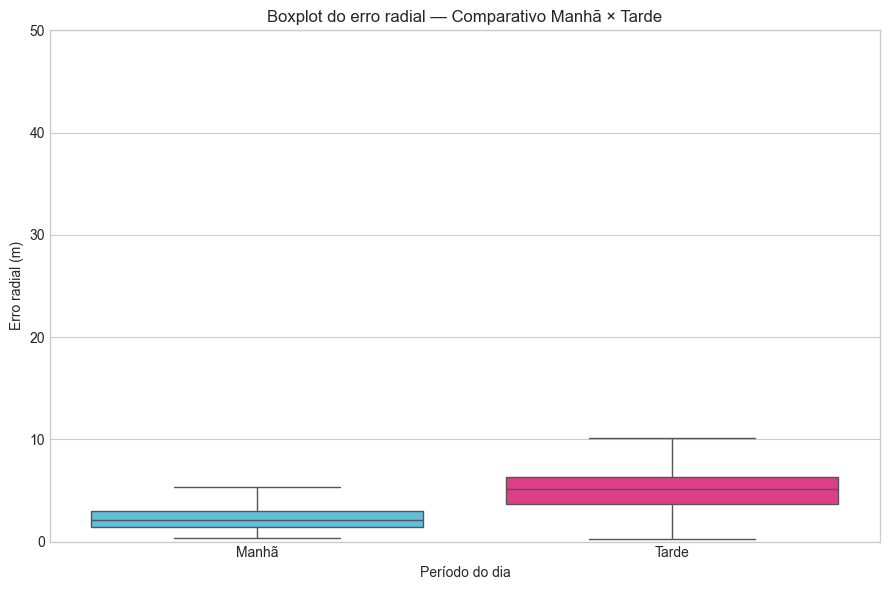

C:\Users\bruno\AppData\Local\Temp\ipykernel_21440\1927202263.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


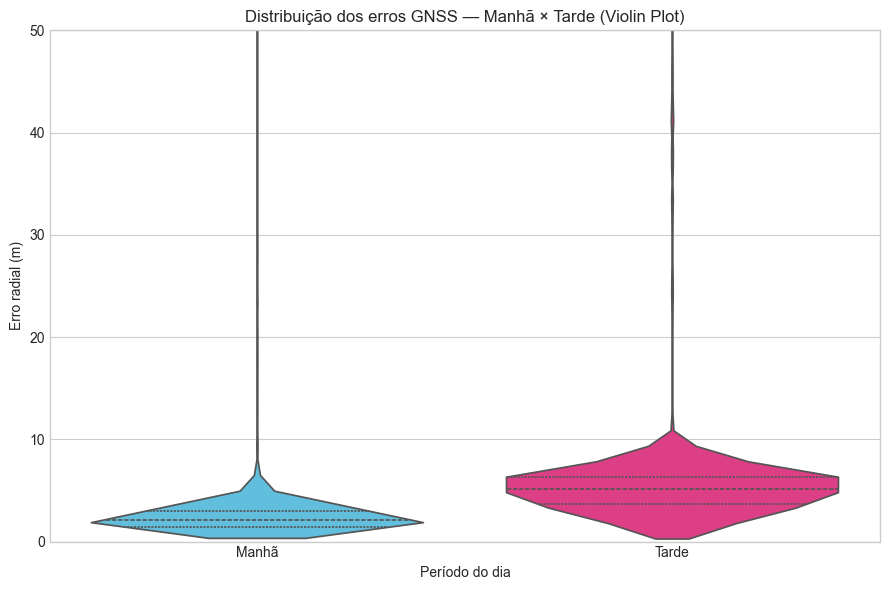

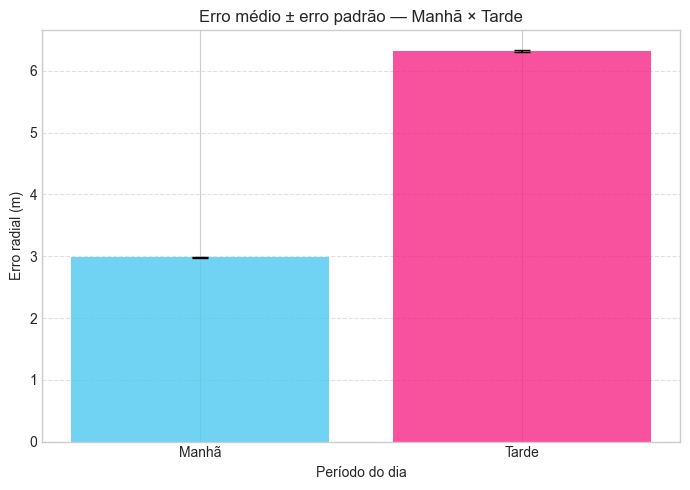

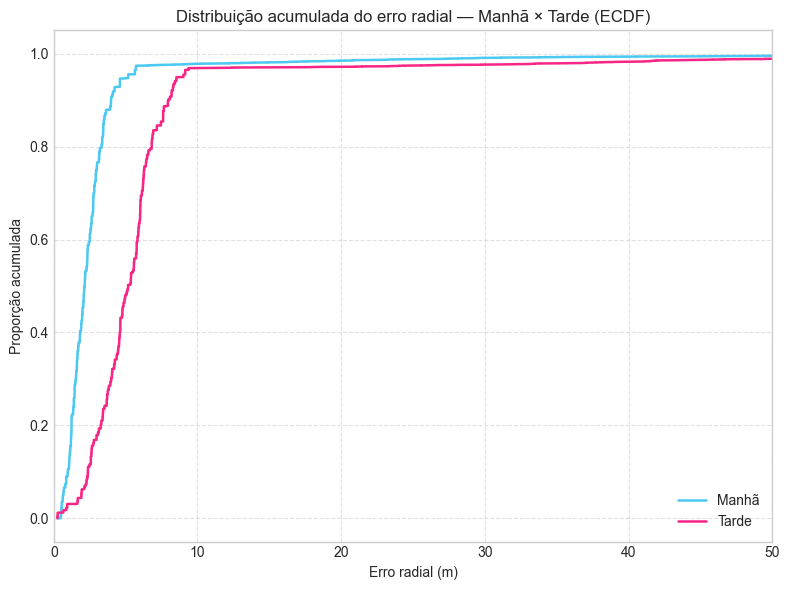

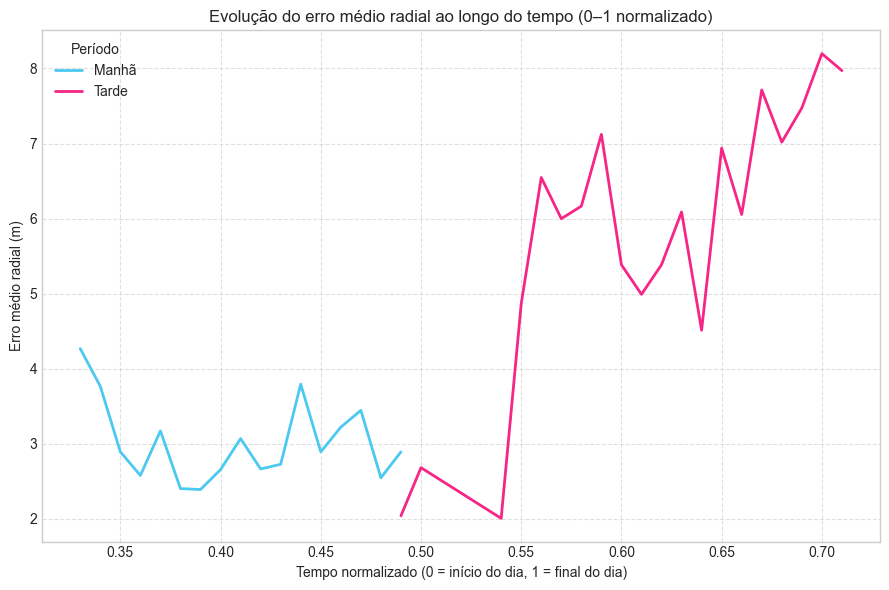

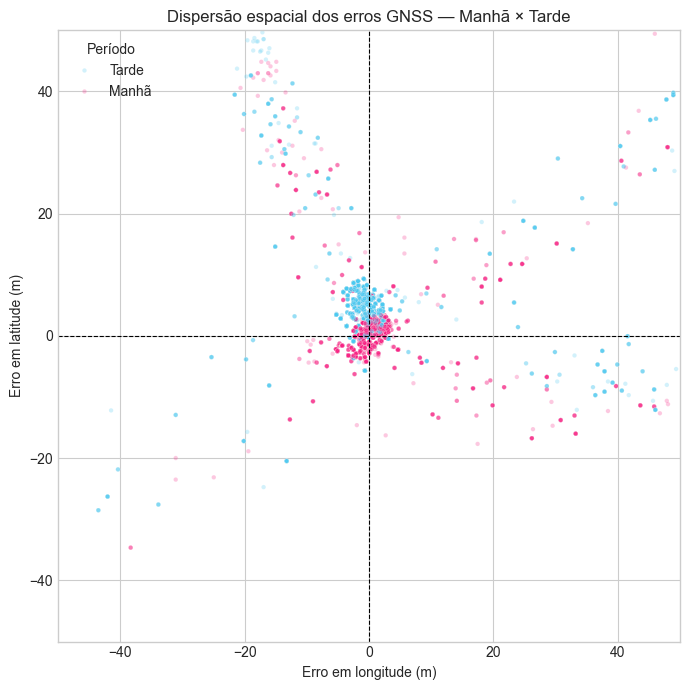

In [10]:
# ============================================
# PARTE 3 — COMPARATIVO MANHÃ × TARDE
# Boxplot | Violin | Barras média±erro | ECDF | Linha temporal | Scatter colorido
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (9, 6)
sns.set_palette("viridis")

# =========================================================
# Divisão dos períodos
# =========================================================
df["periodo"] = np.where(df["timestamp"] < 0.5, "Manhã", "Tarde")
print(df["periodo"].value_counts())

# =========================================================
# 1) Boxplot manhã × tarde (erros)
# =========================================================
plt.figure(figsize=(9,6))
sns.boxplot(
    data=df, 
    x="periodo", 
    y="erro_radial", 
    showfliers=False, 
    palette=["#4CC9F0", "#F72585"]
)
plt.title("Boxplot do erro radial — Comparativo Manhã × Tarde")
plt.xlabel("Período do dia")
plt.ylabel("Erro radial (m)")
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

# =========================================================
# 2) Violin manhã × tarde
# =========================================================
plt.figure(figsize=(9,6))
sns.violinplot(
    data=df, 
    x="periodo", 
    y="erro_radial", 
    inner="quartile", 
    cut=0, 
    palette=["#4CC9F0", "#F72585"]
)
plt.title("Distribuição dos erros GNSS — Manhã × Tarde (Violin Plot)")
plt.xlabel("Período do dia")
plt.ylabel("Erro radial (m)")
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

# =========================================================
# 3) Barras (média ± erro padrão)
# =========================================================
resumo = df.groupby("periodo")["erro_radial"].agg(["mean", "std", "count"])
resumo["sem"] = resumo["std"] / np.sqrt(resumo["count"])

plt.figure(figsize=(7,5))
plt.bar(
    resumo.index,
    resumo["mean"],
    yerr=resumo["sem"],
    capsize=6,
    color=["#4CC9F0", "#F72585"],
    alpha=0.8
)
plt.title("Erro médio ± erro padrão — Manhã × Tarde")
plt.ylabel("Erro radial (m)")
plt.xlabel("Período do dia")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# =========================================================
# 4) ECDF Manhã × Tarde
# =========================================================
plt.figure(figsize=(8,6))
for periodo, cor in zip(["Manhã", "Tarde"], ["#4CC9F0", "#F72585"]):
    dados = np.sort(df.loc[df["periodo"] == periodo, "erro_radial"].values)
    y = np.arange(1, len(dados)+1) / len(dados)
    plt.plot(dados, y, lw=1.8, label=periodo, color=cor)
plt.xlim(0, 50)
plt.xlabel("Erro radial (m)")
plt.ylabel("Proporção acumulada")
plt.title("Distribuição acumulada do erro radial — Manhã × Tarde (ECDF)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# =========================================================
# 5) Linha temporal — erro médio ao longo do tempo
# =========================================================
# agrupa por pequenas janelas de tempo (bins de 0.01 = 1% do dia)
df["bin_tempo"] = (df["timestamp"] // 0.01) / 100
media_tempo = df.groupby(["periodo", "bin_tempo"])["erro_radial"].mean().reset_index()

plt.figure(figsize=(9,6))
sns.lineplot(
    data=media_tempo,
    x="bin_tempo",
    y="erro_radial",
    hue="periodo",
    palette=["#4CC9F0", "#F72585"],
    linewidth=2
)
plt.title("Evolução do erro médio radial ao longo do tempo (0–1 normalizado)")
plt.xlabel("Tempo normalizado (0 = início do dia, 1 = final do dia)")
plt.ylabel("Erro médio radial (m)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Período")
plt.tight_layout()
plt.show()

# =========================================================
# 6) Scatter LAT×LON colorido por período
# =========================================================
amostra = df.sample(40000, random_state=42) if len(df) > 40000 else df

plt.figure(figsize=(7,7))
sns.scatterplot(
    data=amostra,
    x="erro_lon", 
    y="erro_lat", 
    hue="periodo",
    alpha=0.25, 
    s=10,
    palette=["#4CC9F0", "#F72585"]
)
plt.axhline(0, color="black", linestyle="--", lw=0.8)
plt.axvline(0, color="black", linestyle="--", lw=0.8)
plt.title("Dispersão espacial dos erros GNSS — Manhã × Tarde")
plt.xlabel("Erro em longitude (m)")
plt.ylabel("Erro em latitude (m)")
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.legend(title="Período")
plt.tight_layout()
plt.show()


📊 4. Faixas de Precisão GNSS

| Tipo | Nome                                                         | Finalidade                                              |
| ---- | ------------------------------------------------------------ | ------------------------------------------------------- |
| 🧩   | **Barras empilhadas por faixa de erro** (≤0.5 m, 0.5–1 m, …) | Mostra proporção de amostras por faixa de precisão      |
| 📈   | **Curva de Pareto (barras + cumulativo)**                    | Destaca faixas que concentram a maior parte dos dados   |
| 📊   | **Barras lado a lado (lat, lon, radial)**                    | Compara distribuição das faixas entre as três dimensões |
| 🌞   | **Barras empilhadas manhã × tarde**                          | Mostra variação da proporção de faixas por período      |


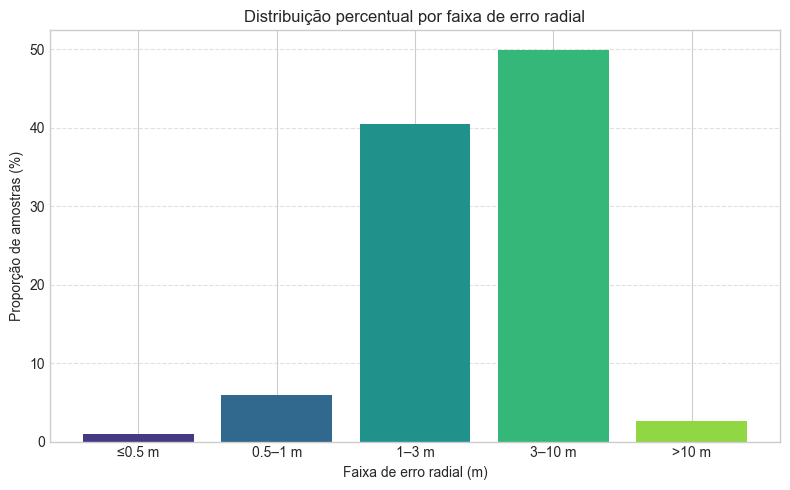

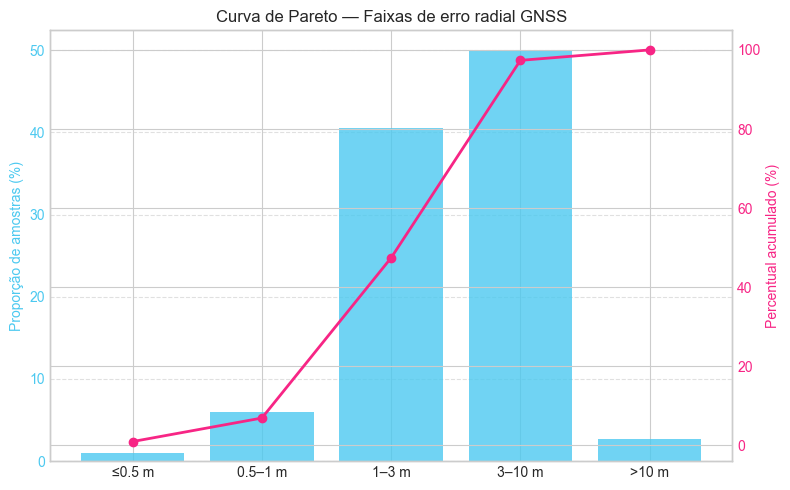

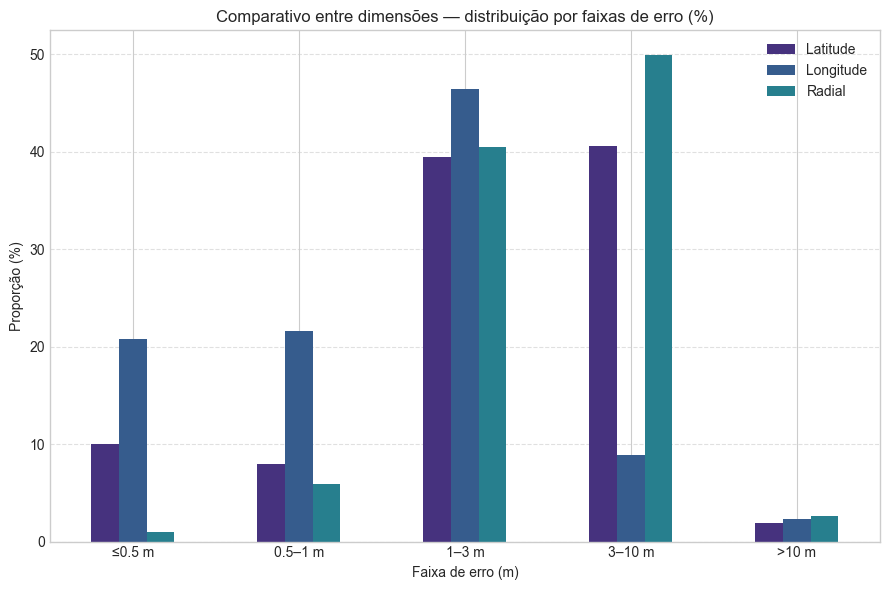

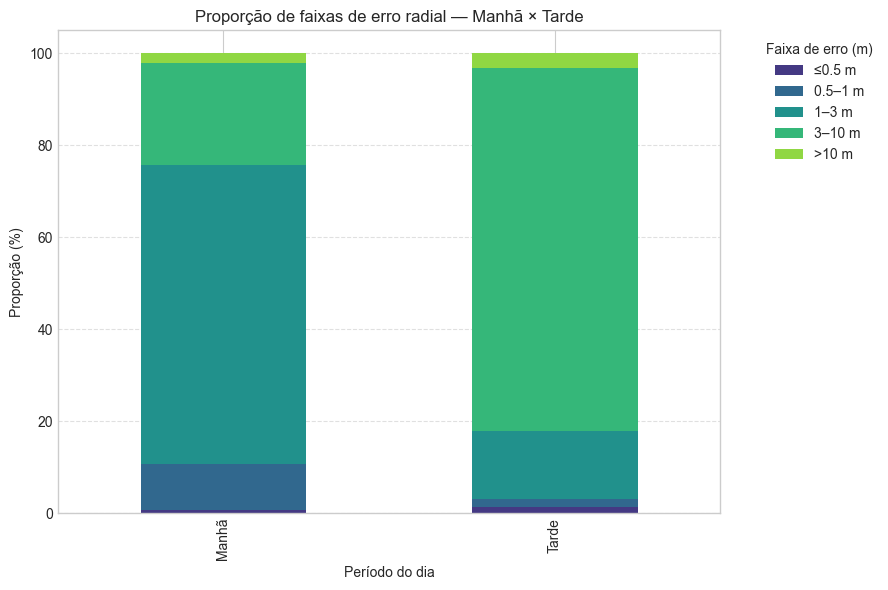

In [12]:
# ============================================
# PARTE 4 — FAIXAS DE PRECISÃO GNSS (corrigido)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (9, 6)
sns.set_palette("viridis")

# =========================================================
# Definição das faixas de erro
# =========================================================
faixas = [0, 0.5, 1, 3, 10, np.inf]
rotulos = ["≤0.5 m", "0.5–1 m", "1–3 m", "3–10 m", ">10 m"]

def classificar_erro(x):
    for i in range(len(faixas)-1):
        if faixas[i] <= x < faixas[i+1]:
            return rotulos[i]
    return ">10 m"

df["faixa_radial"] = df["erro_radial"].apply(classificar_erro)
df["faixa_lat"] = df["erro_lat"].abs().apply(classificar_erro)
df["faixa_lon"] = df["erro_lon"].abs().apply(classificar_erro)

# =========================================================
# 1) Barras empilhadas por faixa (erro radial)
# =========================================================
contagem_faixas = df["faixa_radial"].value_counts().reindex(rotulos)
proporcao = (contagem_faixas / contagem_faixas.sum()) * 100

plt.figure(figsize=(8,5))
plt.bar(rotulos, proporcao, color=sns.color_palette("viridis", len(rotulos)))
plt.title("Distribuição percentual por faixa de erro radial")
plt.ylabel("Proporção de amostras (%)")
plt.xlabel("Faixa de erro radial (m)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# =========================================================
# 2) Curva de Pareto (barras + cumulativo)
# =========================================================
cumulativo = proporcao.cumsum()

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.bar(rotulos, proporcao, color="#4CC9F0", alpha=0.8)
ax1.set_ylabel("Proporção de amostras (%)", color="#4CC9F0")
ax1.tick_params(axis="y", labelcolor="#4CC9F0")
ax1.grid(axis="y", linestyle="--", alpha=0.6)

ax2 = ax1.twinx()
ax2.plot(rotulos, cumulativo, color="#F72585", marker="o", linewidth=2, label="Cumulativo")
ax2.set_ylabel("Percentual acumulado (%)", color="#F72585")
ax2.tick_params(axis="y", labelcolor="#F72585")

plt.title("Curva de Pareto — Faixas de erro radial GNSS")
plt.tight_layout()
plt.show()

# =========================================================
# 3) Barras lado a lado (lat, lon, radial)
# =========================================================
cont_lat = df["faixa_lat"].value_counts(normalize=True).reindex(rotulos)
cont_lon = df["faixa_lon"].value_counts(normalize=True).reindex(rotulos)
cont_rad = df["faixa_radial"].value_counts(normalize=True).reindex(rotulos)

df_faixas_comp = pd.DataFrame({
    "Latitude": cont_lat.values * 100,
    "Longitude": cont_lon.values * 100,
    "Radial": cont_rad.values * 100
}, index=rotulos)

df_faixas_comp.plot(kind="bar", figsize=(9,6))
plt.title("Comparativo entre dimensões — distribuição por faixas de erro (%)")
plt.ylabel("Proporção (%)")
plt.xlabel("Faixa de erro (m)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# =========================================================
# 4) Barras empilhadas manhã × tarde (corrigido)
# =========================================================
df_periodo = df.groupby(["periodo", "faixa_radial"]).size().reset_index(name="contagem")

# 🔧 Corrigido: usar transform em vez de apply (mantém índice alinhado)
df_periodo["proporcao"] = df_periodo.groupby("periodo")["contagem"].transform(lambda x: x / x.sum() * 100)

pivot = df_periodo.pivot(index="periodo", columns="faixa_radial", values="proporcao").reindex(columns=rotulos)

pivot.plot(kind="bar", stacked=True, figsize=(9,6), color=sns.color_palette("viridis", len(rotulos)))
plt.title("Proporção de faixas de erro radial — Manhã × Tarde")
plt.ylabel("Proporção (%)")
plt.xlabel("Período do dia")
plt.legend(title="Faixa de erro (m)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


🔬 5. Relações e Correlações

| Tipo | Nome                                                        | Mostra                                              |
| ---- | ----------------------------------------------------------- | --------------------------------------------------- |
| 🧮   | **Heatmap de correlação** (Pearson, Spearman)               | Relações entre lat, lon, radial, altitude, accuracy |
| 🧭   | **Scatter LAT × LON colorido por amplitude de erro radial** | Mostra padrão direcional e dispersão do erro        |
| 📈   | **Regplot com linha de tendência**                          | Se o erro aumenta com altitude, accuracy, etc.      |
| 🧩   | **Jointplot com histograma marginal**                       | Correlação entre lat e lon com densidade lateral    |


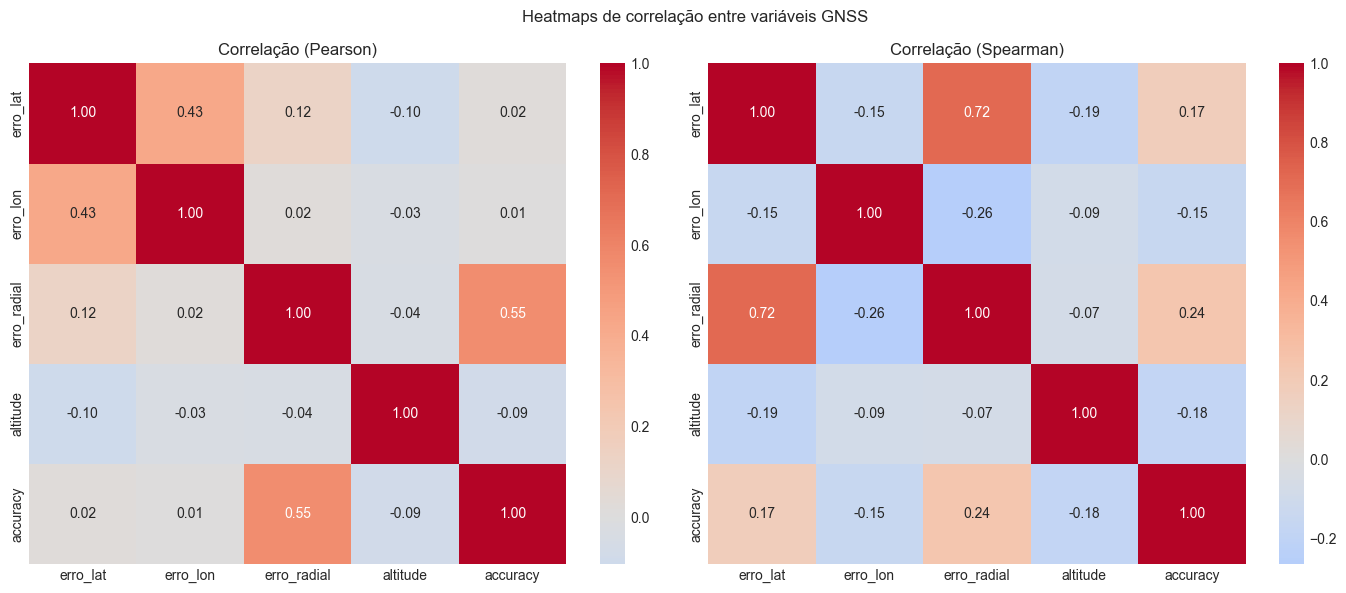

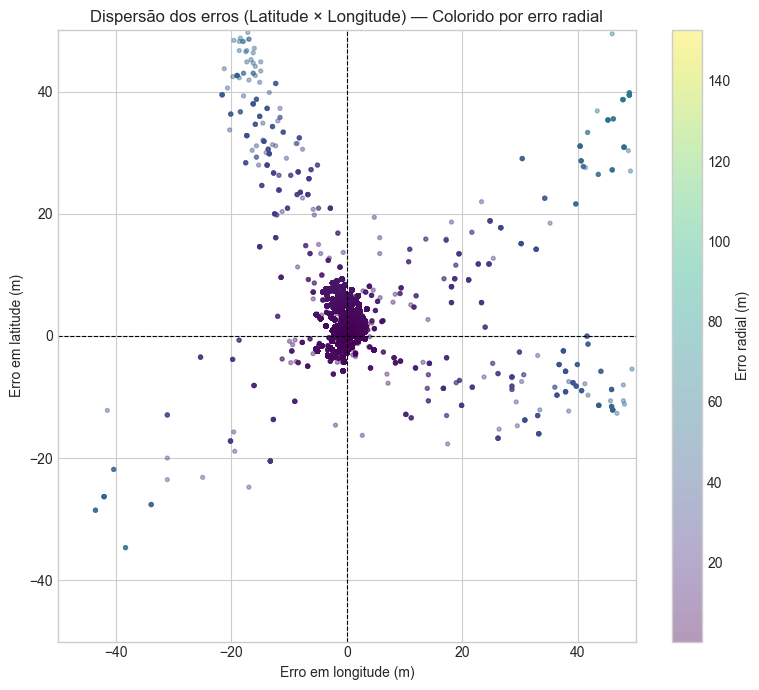

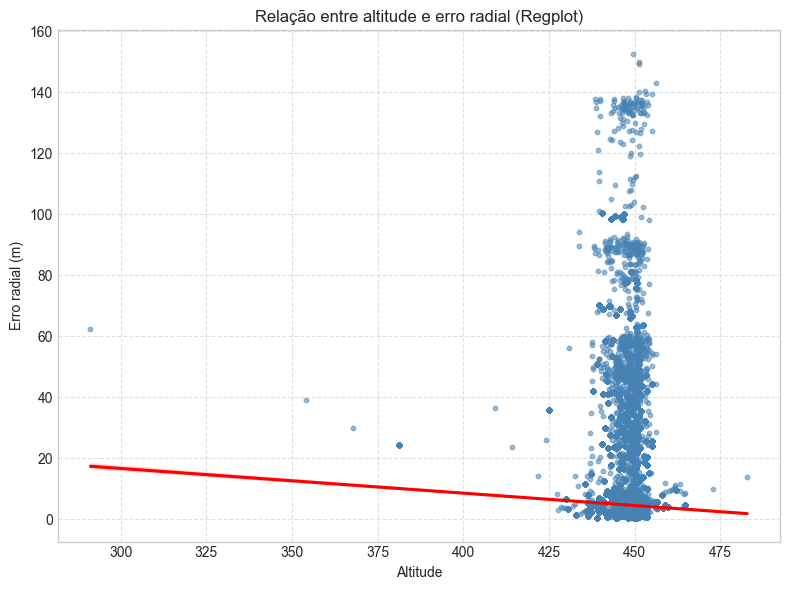

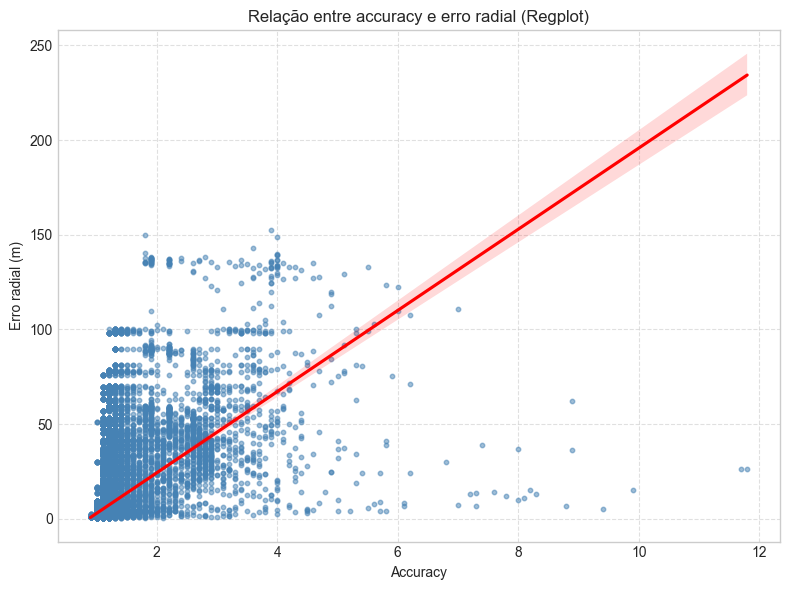

C:\Users\bruno\AppData\Local\Temp\ipykernel_21440\3032576502.py:92: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


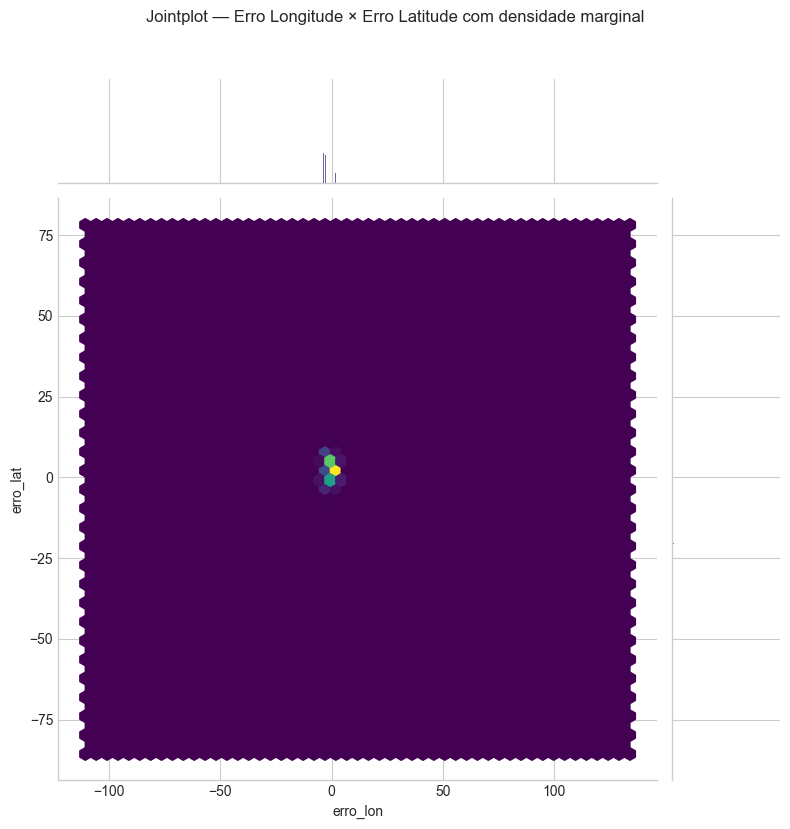

In [ ]:
# ============================================
# PARTE 5 — RELAÇÕES E CORRELAÇÕES GNSS
# Heatmap Pearson/Spearman | Scatter colorido | Regplot | Jointplot
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (9, 6)
sns.set_palette("viridis")

# =========================================================
# 1) Heatmaps de correlação (Pearson e Spearman)
# =========================================================
cols_corr = ["erro_lat", "erro_lon", "erro_radial", "altitude", "accuracy"]
df_corr = df[cols_corr].copy()

corr_pearson = df_corr.corr(method="pearson")
corr_spearman = df_corr.corr(method="spearman")

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=ax[0])
ax[0].set_title("Correlação (Pearson)")
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=ax[1])
ax[1].set_title("Correlação (Spearman)")
plt.suptitle("Heatmaps de correlação entre variáveis GNSS")
plt.tight_layout()
plt.show()

# =========================================================
# 2) Scatter LAT × LON colorido por amplitude de erro radial
# =========================================================
amostra = df.sample(40000, random_state=42) if len(df) > 40000 else df

plt.figure(figsize=(8,7))
scatter = plt.scatter(
    amostra["erro_lon"],
    amostra["erro_lat"],
    c=amostra["erro_radial"],
    cmap="viridis",
    s=8,
    alpha=0.4
)
plt.colorbar(scatter, label="Erro radial (m)")
plt.axhline(0, color="black", linestyle="--", lw=0.8)
plt.axvline(0, color="black", linestyle="--", lw=0.8)
plt.title("Dispersão dos erros (Latitude × Longitude) — Colorido por erro radial")
plt.xlabel("Erro em longitude (m)")
plt.ylabel("Erro em latitude (m)")
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.tight_layout()
plt.show()

# =========================================================
# 3) Regplots — relação do erro radial com altitude e accuracy
# =========================================================
for var in ["altitude", "accuracy"]:
    plt.figure(figsize=(8,6))
    sns.regplot(
        data=df,
        x=var,
        y="erro_radial",
        scatter_kws={"alpha":0.3, "s":10},
        line_kws={"color":"red"},
        color="steelblue"
    )
    plt.title(f"Relação entre {var} e erro radial (Regplot)")
    plt.xlabel(var.capitalize())
    plt.ylabel("Erro radial (m)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# =========================================================
# 4) Jointplot com histograma marginal — erro LAT × LON
# =========================================================
sns.jointplot(
    data=amostra,
    x="erro_lon",
    y="erro_lat",
    kind="hex",
    cmap="viridis",
    space=0,
    height=8,
    marginal_kws=dict(bins=50, fill=True)
)
plt.suptitle("Jointplot — Erro Longitude × Erro Latitude com densidade marginal", y=1.03)
plt.tight_layout()
plt.show()


🚩 6. Robustez e Diagnóstico (opcional)

| Tipo | Nome                                          | Função                                                     |
| ---- | --------------------------------------------- | ---------------------------------------------------------- |
| 🧱   | **Boxen plot (enhanced boxplot)**             | Evidencia caudas longas e dispersão extrema                |
| 🧮   | **QQ-plot** (Quantile-Quantile)               | Verifica se erro segue distribuição normal                 |
| 📈   | **Rolling mean de erro radial por timestamp** | Tendência local do erro no tempo                           |
| 🕳   | **Log-scale histograma de erros**             | Mostra magnitude quando há valores muito grandes (> 100 m) |


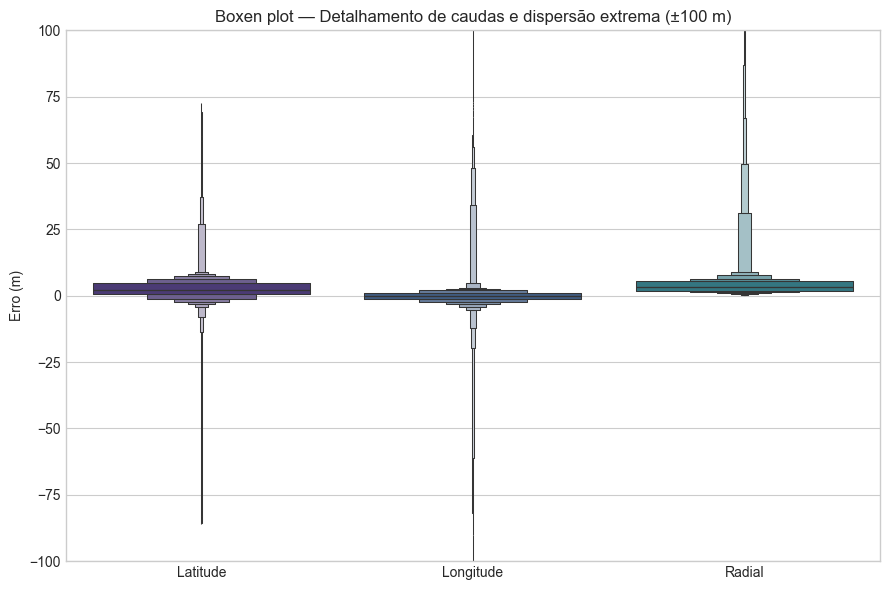

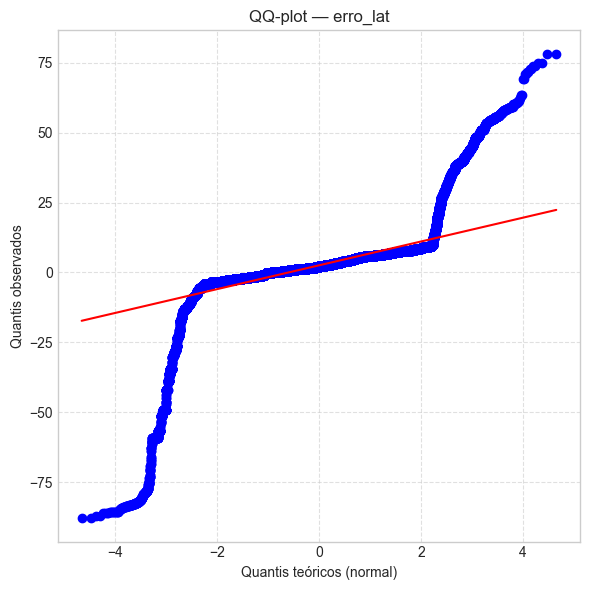

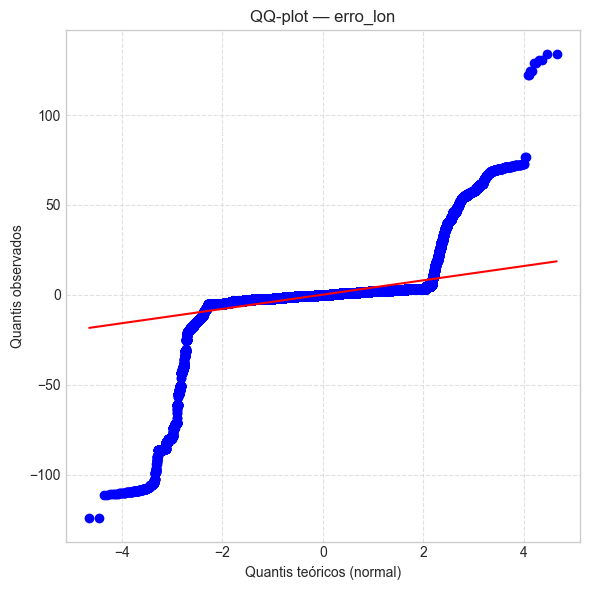

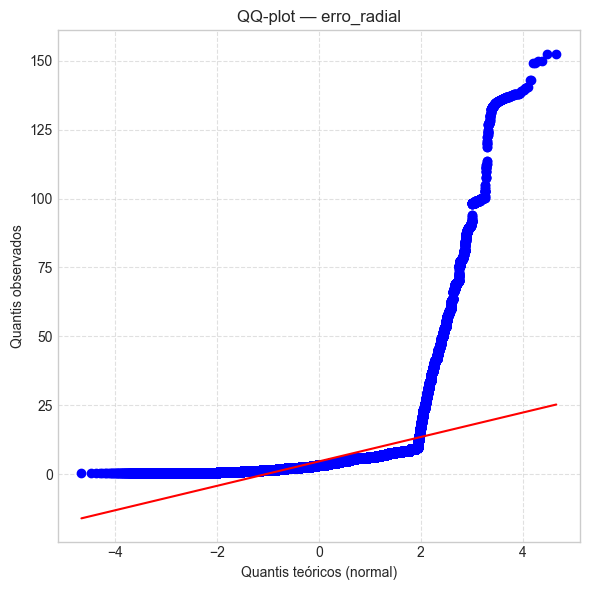

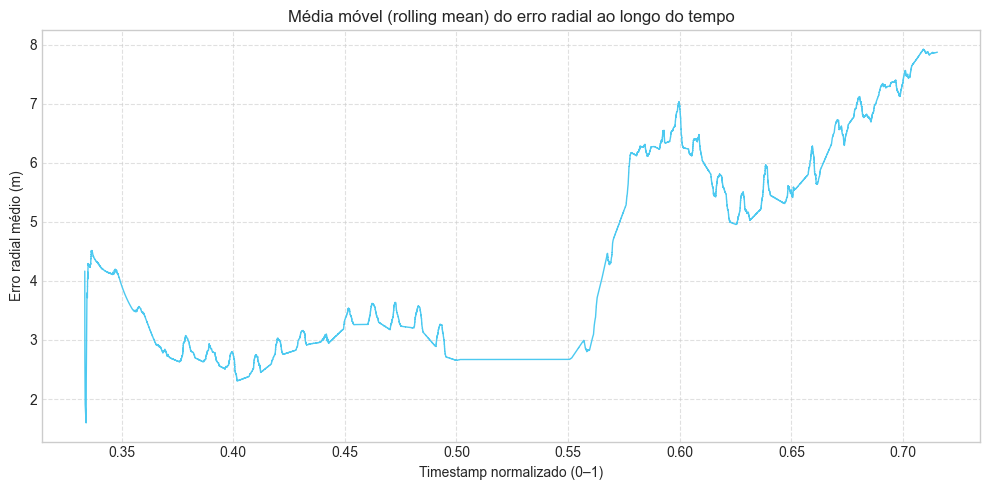

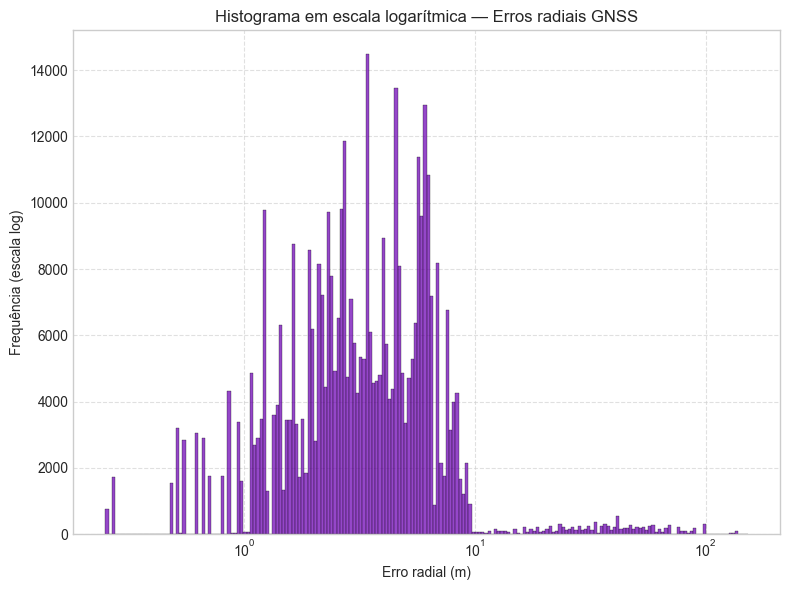

In [18]:
# ============================================
# PARTE 6 — ROBUSTEZ E DIAGNÓSTICO DOS ERROS GNSS
# Boxen plot | QQ-plot | Rolling mean | Log-scale histograma
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (9, 6)
sns.set_palette("viridis")

# =========================================================
# 1) Boxen plot (enhanced boxplot)
# =========================================================
plt.figure(figsize=(9,6))
sns.boxenplot(
    data=df[["erro_lat", "erro_lon", "erro_radial"]].clip(-100, 100),
    showfliers=False
)
plt.title("Boxen plot — Detalhamento de caudas e dispersão extrema (±100 m)")
plt.ylabel("Erro (m)")
plt.ylim(-100, 100)
plt.xticks([0,1,2], ["Latitude", "Longitude", "Radial"])
plt.tight_layout()
plt.show()

# =========================================================
# 2) QQ-plot (Quantile-Quantile)
# =========================================================
for col in ["erro_lat", "erro_lon", "erro_radial"]:
    plt.figure(figsize=(6,6))
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ-plot — {col}")
    plt.xlabel("Quantis teóricos (normal)")
    plt.ylabel("Quantis observados")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# =========================================================
# 3) Rolling mean de erro radial ao longo do tempo
# =========================================================
# Ordena por timestamp e aplica média móvel (janela de 1 000 amostras)
df_sorted = df.sort_values("timestamp")
df_sorted["rolling_mean"] = df_sorted["erro_radial"].rolling(window=30000, min_periods=1).mean()

plt.figure(figsize=(10,5))
plt.plot(df_sorted["timestamp"], df_sorted["rolling_mean"], color="#4CC9F0", lw=1)
plt.title("Média móvel (rolling mean) do erro radial ao longo do tempo")
plt.xlabel("Timestamp normalizado (0–1)")
plt.ylabel("Erro radial médio (m)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# =========================================================
# 4) Histograma em escala logarítmica dos erros radiais
# =========================================================
plt.figure(figsize=(8,6))
sns.histplot(df["erro_radial"], bins=200, log_scale=True, kde=False, color="#7209B7")
plt.title("Histograma em escala logarítmica — Erros radiais GNSS")
plt.xlabel("Erro radial (m)")
plt.ylabel("Frequência (escala log)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


🧾 7. Tabelas e Resumos (para o TCC em formato imagem)

| Tipo | Conteúdo                                        | Finalidade                          |
| ---- | ----------------------------------------------- | ----------------------------------- |
| 📋   | Tabela global (mean, median, std, IQR, RMSE)    | Apresentar estatísticas resumidas   |
| 📋   | Tabela comparativa manhã × tarde                | Destacar variações estatísticas     |
| 📋   | Tabela de faixas (% de amostras em cada classe) | Quantificar a precisão GNSS da base |


In [17]:
# ============================================
# PARTE 7 — TABELAS E RESUMOS ESTATÍSTICOS (versão ampliada)
# Inclui Latitude, Longitude e Radial no comparativo por período
# ============================================

import numpy as np
import pandas as pd

# ------------------------------------------------------------
# Funções auxiliares
# ------------------------------------------------------------
def calcular_estatisticas(serie):
    """Retorna estatísticas descritivas padronizadas."""
    serie = pd.Series(serie).dropna()
    q1, q3 = np.percentile(serie, [25, 75])
    iqr = q3 - q1
    return {
        "Média (m)": serie.mean(),
        "Mediana (m)": serie.median(),
        "Desvio padrão (m)": serie.std(),
        "IQR (m)": iqr,
        "RMSE (m)": np.sqrt(np.mean(serie**2)),
        "N (amostras)": len(serie)
    }

def resumo_periodo(df_periodo):
    """Resumo para cada período e cada tipo de erro."""
    resumo = {}
    for col in ["erro_lat", "erro_lon", "erro_radial"]:
        resumo[col] = calcular_estatisticas(df_periodo[col])
    return pd.DataFrame(resumo).T

# ------------------------------------------------------------
# 1) TABELA GLOBAL (Lat / Lon / Radial)
# ------------------------------------------------------------
estatisticas_globais = pd.DataFrame({
    "Erro Latitude": calcular_estatisticas(df["erro_lat"]),
    "Erro Longitude": calcular_estatisticas(df["erro_lon"]),
    "Erro Radial": calcular_estatisticas(df["erro_radial"])
}).T

estatisticas_globais_fmt = estatisticas_globais.applymap(
    lambda x: f"{x:,.4f}" if isinstance(x, (int, float)) else x
)

print("📋 TABELA 1 – Estatísticas Globais dos Erros GNSS (m)")
display(estatisticas_globais_fmt)

# ------------------------------------------------------------
# 2) COMPARATIVO MANHÃ × TARDE (Lat / Lon / Radial)
# ------------------------------------------------------------
tabelas_periodos = []
for periodo in df["periodo"].unique():
    dfp = df[df["periodo"] == periodo]
    tabela = resumo_periodo(dfp)
    tabela["Período"] = periodo
    tabelas_periodos.append(tabela)

comparativo_periodos = pd.concat(tabelas_periodos)
comparativo_periodos = comparativo_periodos.set_index(["Período"], append=True).unstack(level=-1)
comparativo_periodos.columns = ["_".join(col).strip() for col in comparativo_periodos.columns.values]
comparativo_periodos = comparativo_periodos[[
    "Média (m)_Manhã", "Média (m)_Tarde",
    "Mediana (m)_Manhã", "Mediana (m)_Tarde",
    "Desvio padrão (m)_Manhã", "Desvio padrão (m)_Tarde",
    "RMSE (m)_Manhã", "RMSE (m)_Tarde",
    "N (amostras)_Manhã", "N (amostras)_Tarde"
]]

comparativo_fmt = comparativo_periodos.applymap(
    lambda x: f"{x:,.4f}" if isinstance(x, (int, float)) else x
)

print("\n📋 TABELA 2 – Comparativo Manhã × Tarde (Latitude, Longitude e Radial)")
display(comparativo_fmt)

# ------------------------------------------------------------
# 3) TABELA DE FAIXAS — % por classe de erro (radial)
# ------------------------------------------------------------
faixas = ["≤0.5 m", "0.5–1 m", "1–3 m", "3–10 m", ">10 m"]
dist_faixas = (
    df["faixa_radial"]
    .value_counts(normalize=True)
    .reindex(faixas)
    .mul(100)
    .round(2)
    .rename("Proporção (%)")
)
tabela_faixas = pd.DataFrame(dist_faixas).fillna(0)
tabela_faixas["Proporção (%)"] = tabela_faixas["Proporção (%)"].map("{:.2f}".format)

print("\n📋 TABELA 3 – Distribuição por Faixas de Erro Radial GNSS (%)")
display(tabela_faixas)

# ------------------------------------------------------------
# (opcional) salvar LaTeX / CSV
# ------------------------------------------------------------
# estatisticas_globais_fmt.to_latex("tabela_global.tex", index=True)
# comparativo_fmt.to_latex("tabela_comparativo_lat_lon_rad.tex", index=True)
# tabela_faixas.to_latex("tabela_faixas.tex", index=True)


📋 TABELA 1 – Estatísticas Globais dos Erros GNSS (m)


,Média (m),Mediana (m),Desvio padrão (m),IQR (m),RMSE (m),N (amostras)
Erro Latitude,2.5426,2.1100,5.4145,4.1900,5.9818,"419,878.0000"
Erro Longitude,0.1021,-0.1000,6.7178,2.4400,6.7186,"419,878.0000"
Erro Radial,4.6158,3.2066,7.7211,3.6004,8.9956,"419,878.0000"



📋 TABELA 2 – Comparativo Manhã × Tarde (Latitude, Longitude e Radial)


,Média (m)_Manhã,Média (m)_Tarde,Mediana (m)_Manhã,Mediana (m)_Tarde,Desvio padrão (m)_Manhã,Desvio padrão (m)_Tarde,RMSE (m)_Manhã,RMSE (m)_Tarde,N (amostras)_Manhã,N (amostras)_Tarde
erro_lat,0.5596,4.6089,0.8300,4.7000,4.0997,5.8297,4.1377,7.4315,"214,258.0000","205,620.0000"
erro_lon,0.5911,-0.4074,0.3900,-0.6200,5.1920,7.9722,5.2255,7.9826,"214,258.0000","205,620.0000"
erro_radial,2.9811,6.3192,2.1508,5.1719,5.9615,8.8891,6.6653,10.9064,"214,258.0000","205,620.0000"



📋 TABELA 3 – Distribuição por Faixas de Erro Radial GNSS (%)


,Proporção (%)
faixa_radial,
≤0.5 m,0.96
0.5–1 m,5.95
1–3 m,40.51
3–10 m,49.93
>10 m,2.64


💡 Resumo dos grupos prioritários (recomendação para o TCC)

| Etapa                                            | Gráficos-chave                                                  |
| ------------------------------------------------ | --------------------------------------------------------------- |
| **Parte 1 – Exploração geral e erro bruto**      | Histograma + KDE, Boxplot global, Heatmap de correlação         |
| **Parte 2 – Comparativo temporal (manhã/tarde)** | Boxplot manhã×tarde, Barras média±erro padrão, ECDF comparativo |
| **Parte 3 – Dispersão espacial (erro LAT×LON)**  | Scatter/Hexbin LAT×LON e Heatmap                                |
| **Parte 4 – Faixas de erro**                     | Barras empilhadas de faixas e Pareto                            |
| **Parte 5 – Síntese final**                      | Tabelas de métricas e resumos comparativos                      |
